# Практическое задание: Деревья Решений

В этом практическом задании вы будете применять знания о деревьях решений на реальных данных. Выполните задания последовательно, используя подсказки и документацию библиотек при необходимости.

## Цели практического задания:
1. Научиться подготавливать данные для деревьев решений
2. Построить и настроить модель дерева решений
3. Визуализировать и интерпретировать результаты
4. Провести оптимизацию гиперпараметров
5. Оценить производительность модели

## Задание 1: Подготовка данных

1. Импортируйте необходимые библиотеки (numpy, pandas, sklearn, etc.)
2. Загрузите датасет iris из sklearn.datasets
3. Создайте DataFrame с данными и добавьте понятные названия столбцов
4. Проведите базовый анализ данных:
   - Проверьте размер датасета
   - Изучите распределение классов
   - Постройте корреляционную матрицу
   - Визуализируйте распределение признаков

Подсказка: используйте pandas.DataFrame, seaborn.heatmap, plotly для визуализации

Размер датасета: (150, 5)

Распределение классов:
species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64


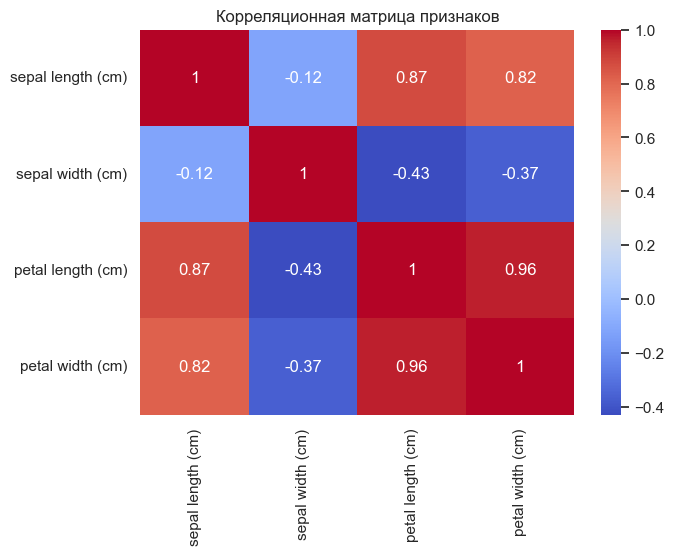

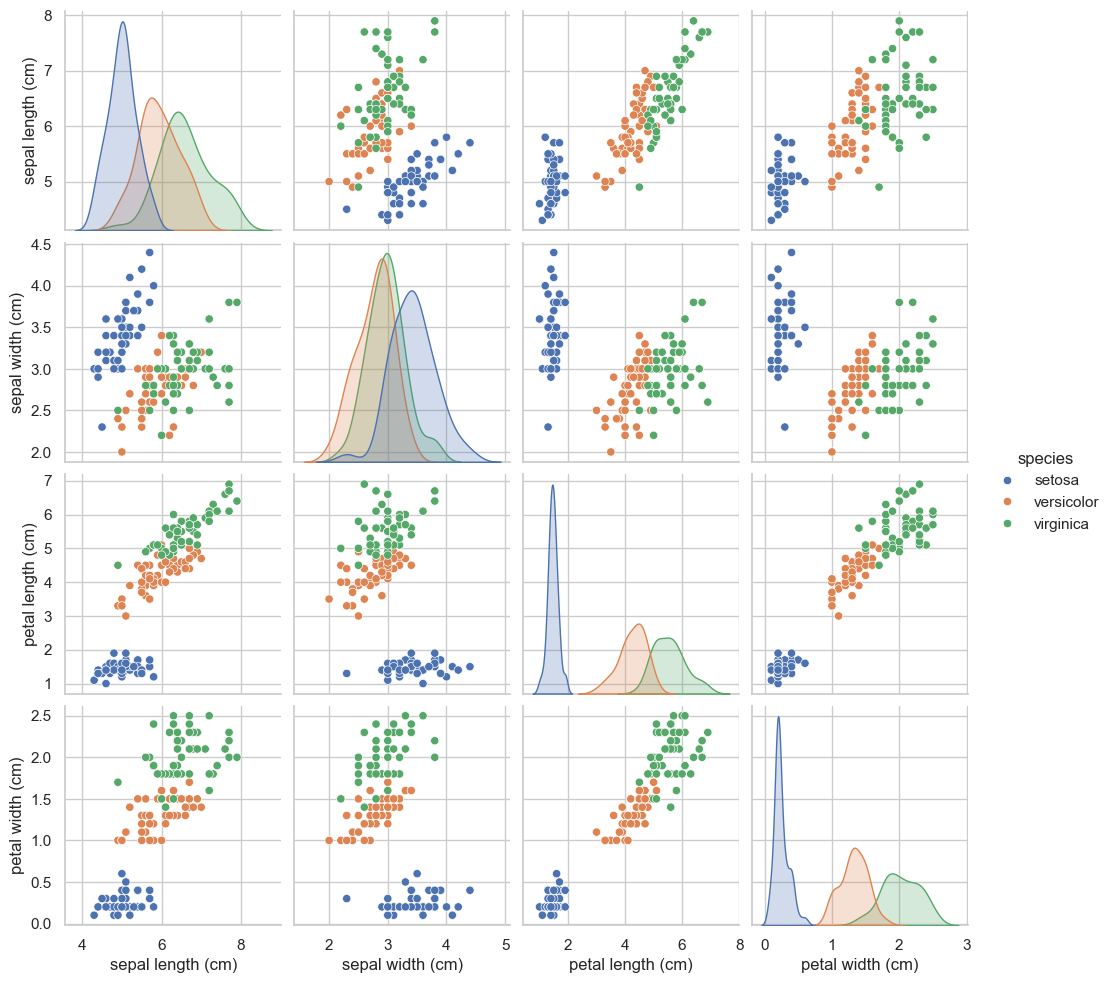

In [55]:
# Задание 1: Подготовка данных

# 1. Импорт необходимых библиотек
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
import plotly.express as px

sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (8, 5)
iris = load_iris()

df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['species'] = iris.target
df['species'] = df['species'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

print("Размер датасета:", df.shape)
print("\nРаспределение классов:")
print(df['species'].value_counts())

plt.figure(figsize=(7, 5))
sns.heatmap(df.iloc[:, :4].corr(), annot=True, cmap="coolwarm")
plt.title("Корреляционная матрица признаков")
plt.show()

sns.pairplot(df, hue="species", diag_kind="kde")
plt.show()

fig = px.scatter_matrix(
    df,
    dimensions=df.columns[:4],
    color="species",
    title="Интерактивная визуализация признаков Iris"
)
fig.show()

## Задание 2: Построение базовой модели

1. Разделите данные на обучающую и тестовую выборки (test_size=0.2)
2. Создайте и обучите базовое дерево решений без настройки параметров
3. Оцените точность модели на тестовой выборке
4. Выведите отчет о классификации
5. Визуализируйте полученное дерево

Подсказка: используйте train_test_split, DecisionTreeClassifier, classification_report

Размер обучающей выборки: (120, 4)
Размер тестовой выборки: (30, 4)

✅ Модель обучена!

Точность модели на тестовой выборке: 1.0000

Отчет о классификации:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



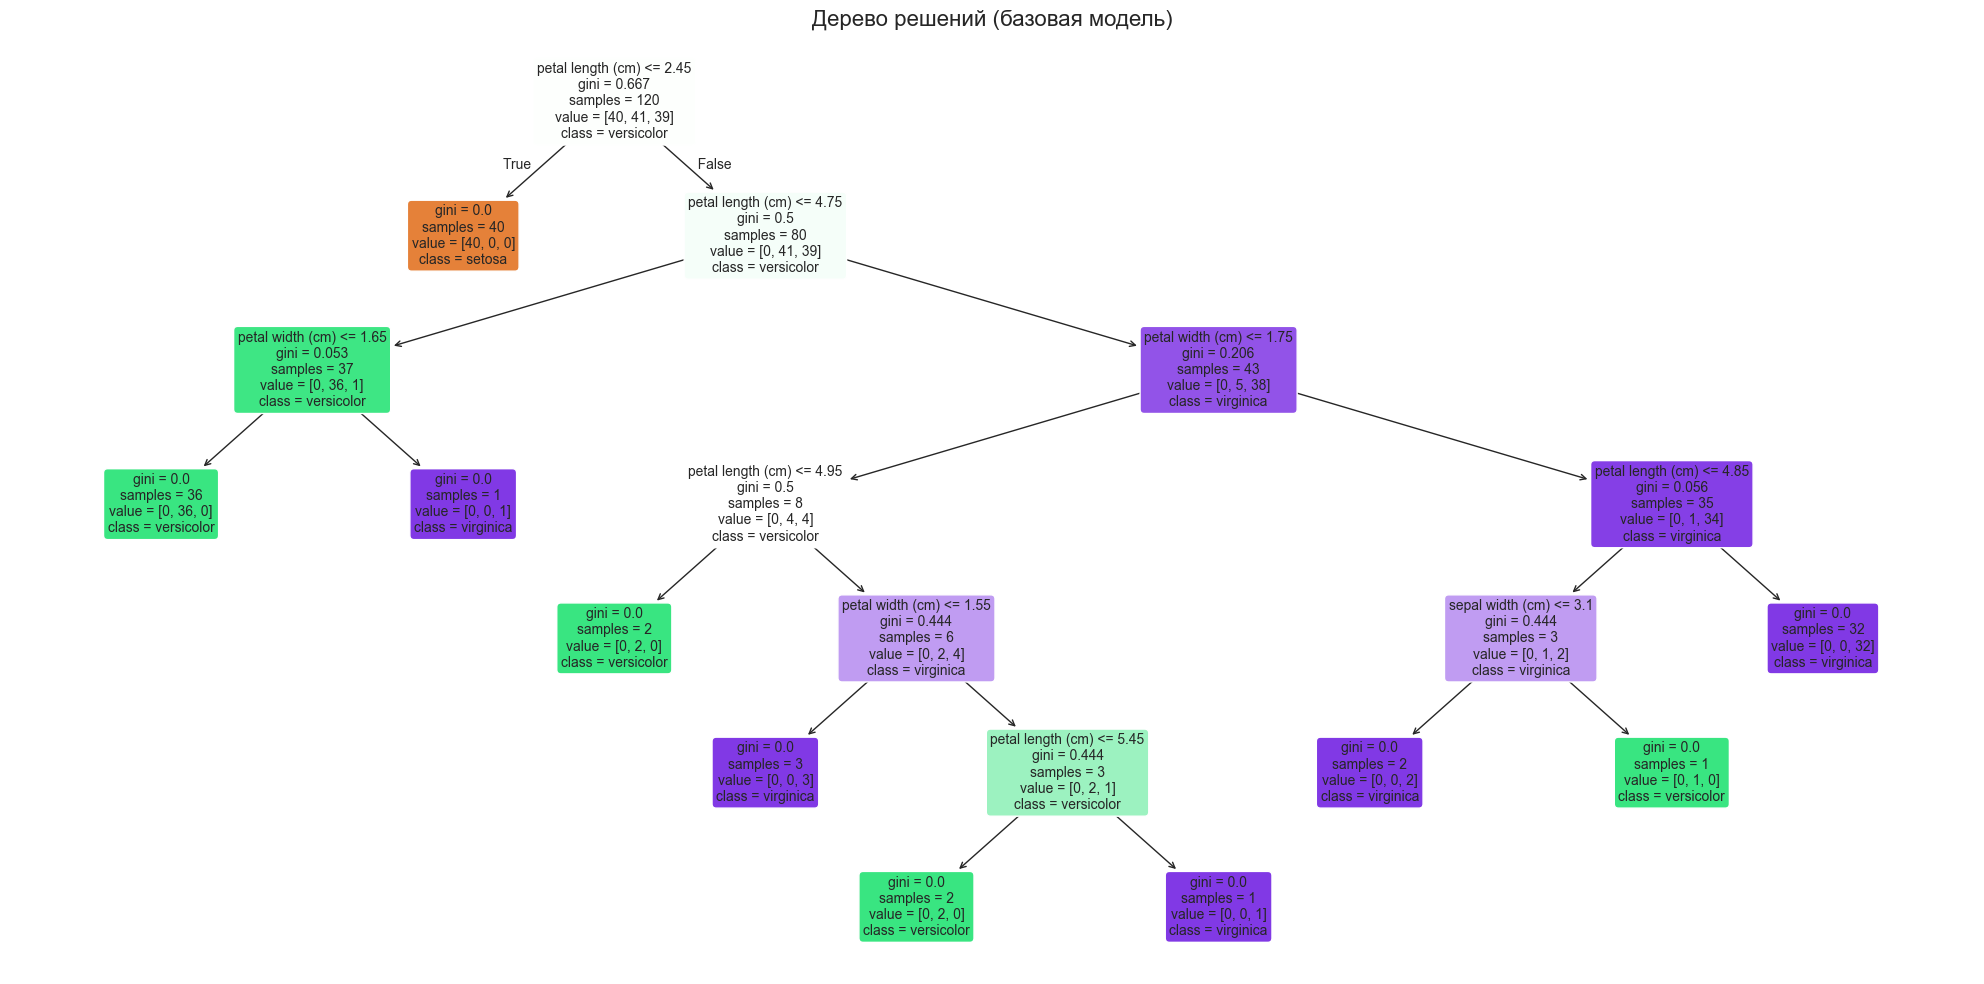

In [56]:
# Задание 2: Построение базовой модели

# Импорт необходимых библиотек
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, accuracy_score

# Загрузка данных
iris = load_iris()
X = iris.data
y = iris.target

# 1. Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Размер обучающей выборки:", X_train.shape)
print("Размер тестовой выборки:", X_test.shape)

# 2. Создание и обучение базового дерева решений
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

print("\n✅ Модель обучена!")

# 3. Оценка точности на тестовой выборке
y_pred = dt_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"\nТочность модели на тестовой выборке: {accuracy:.4f}")

# 4. Отчет о классификации
print("\nОтчет о классификации:")
print(classification_report(y_test, y_pred, target_names=iris.target_names))

# 5. Визуализация дерева решений
plt.figure(figsize=(20, 10))
plot_tree(
    dt_classifier,
    feature_names=iris.feature_names,
    class_names=iris.target_names,
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title("Дерево решений (базовая модель)", fontsize=16)
plt.tight_layout()
plt.show()

## Задание 3: Анализ важности признаков

1. Получите и визуализируйте важность признаков из вашей модели
2. Создайте столбчатую диаграмму важности признаков
3. Постройте тепловую карту корреляций для топ-5 важных признаков
4. Проанализируйте, есть ли связь между важностью признаков и их статистическими характеристиками

Дополнительно:
- Попробуйте построить модель, используя только 2 самых важных признака
- Сравните производительность с полной моделью

ЗАДАНИЕ 3: АНАЛИЗ ВАЖНОСТИ ПРИЗНАКОВ

Важность признаков:
          feature  importance
petal length (cm)    0.906143
 petal width (cm)    0.077186
 sepal width (cm)    0.016670
sepal length (cm)    0.000000


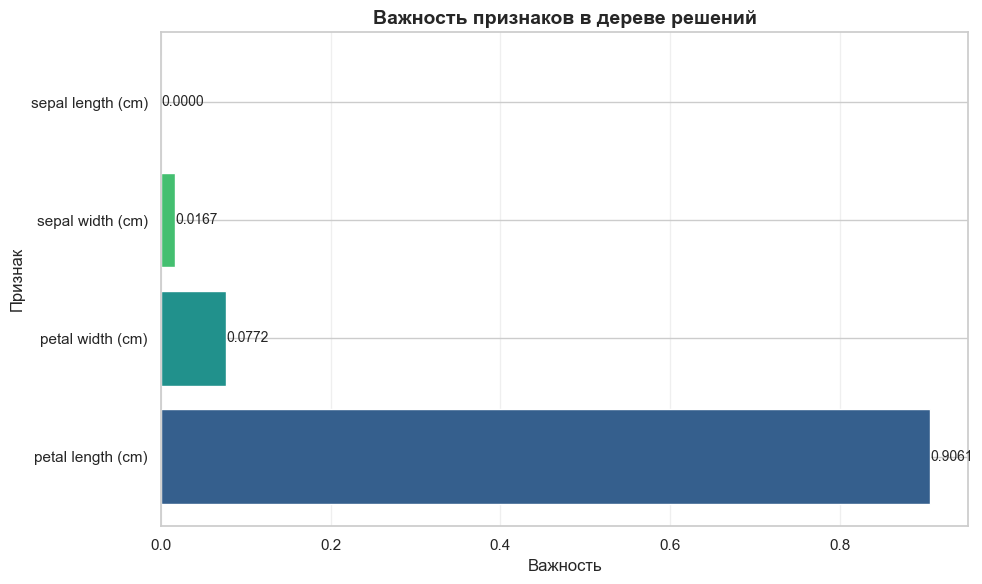


КОРРЕЛЯЦИИ ВАЖНЫХ ПРИЗНАКОВ
Корреляционная матрица топ признаков:
                   petal length (cm)  petal width (cm)  sepal width (cm)  \
petal length (cm)           1.000000          0.962865         -0.428440   
petal width (cm)            0.962865          1.000000         -0.366126   
sepal width (cm)           -0.428440         -0.366126          1.000000   
sepal length (cm)           0.871754          0.817941         -0.117570   

                   sepal length (cm)  
petal length (cm)           0.871754  
petal width (cm)            0.817941  
sepal width (cm)           -0.117570  
sepal length (cm)           1.000000  


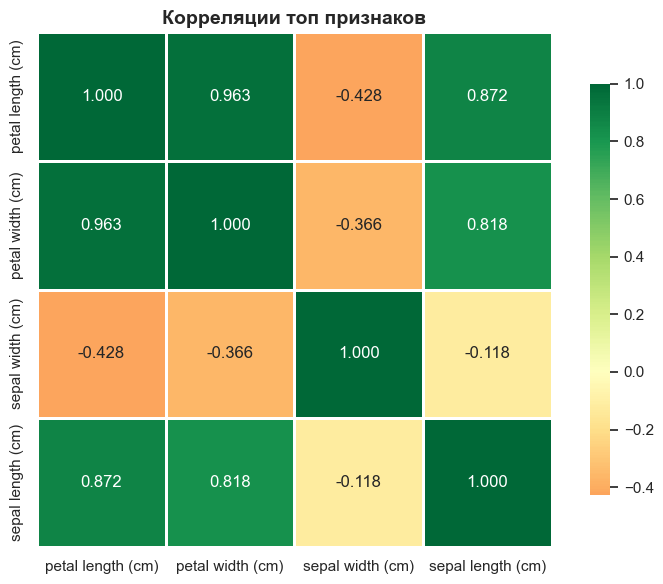


СТАТИСТИЧЕСКИЙ АНАЛИЗ ПРИЗНАКОВ
          feature  importance     mean      std  min  max  range
petal length (cm)    0.906143 3.758000 1.759404  1.0  6.9    5.9
 petal width (cm)    0.077186 1.199333 0.759693  0.1  2.5    2.4
 sepal width (cm)    0.016670 3.057333 0.434411  2.0  4.4    2.4
sepal length (cm)    0.000000 5.843333 0.825301  4.3  7.9    3.6

КОРРЕЛЯЦИЯ ВАЖНОСТИ С ХАРАКТЕРИСТИКАМИ
Корреляция важность - стандартное отклонение: 0.9548
Корреляция важность - диапазон: 0.9194

СРАВНЕНИЕ: ПОЛНАЯ МОДЕЛЬ vs ТОП-2 ПРИЗНАКА

Топ-2 признака: ['petal length (cm)' 'petal width (cm)']

Полная модель (4 признака):
  Обучающая выборка: 1.0000
  Тестовая выборка: 1.0000

Модель с топ-2 признаками:
  Обучающая выборка: 0.9917
  Тестовая выборка: 1.0000

Разница в точности на тесте: 0.00%


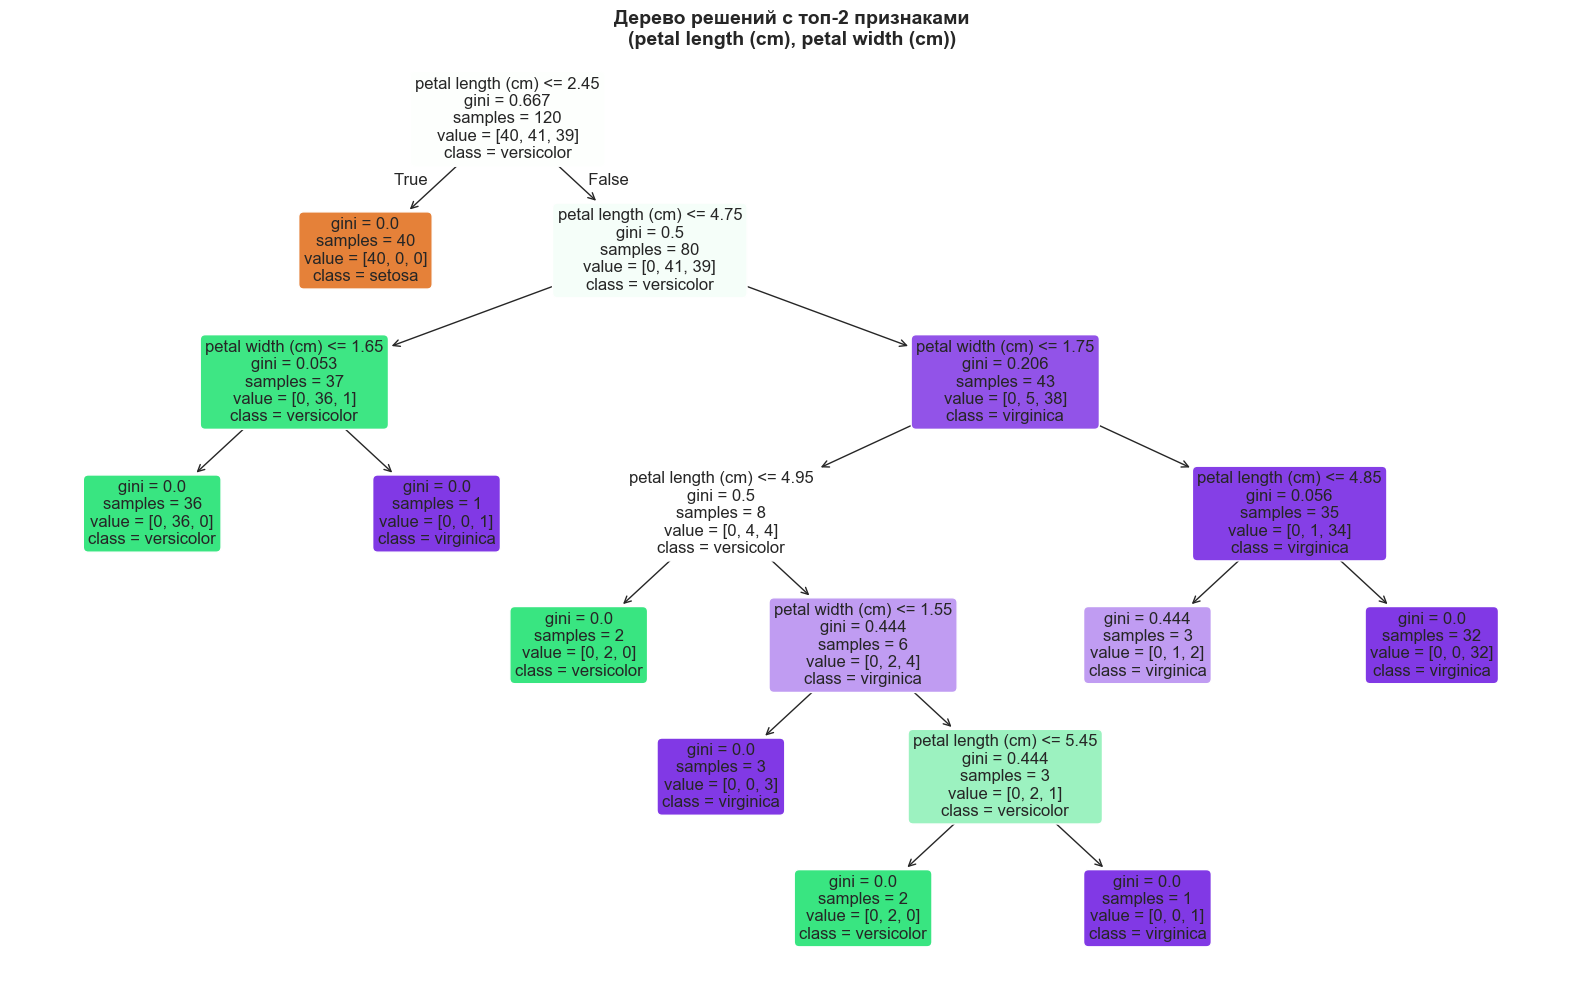

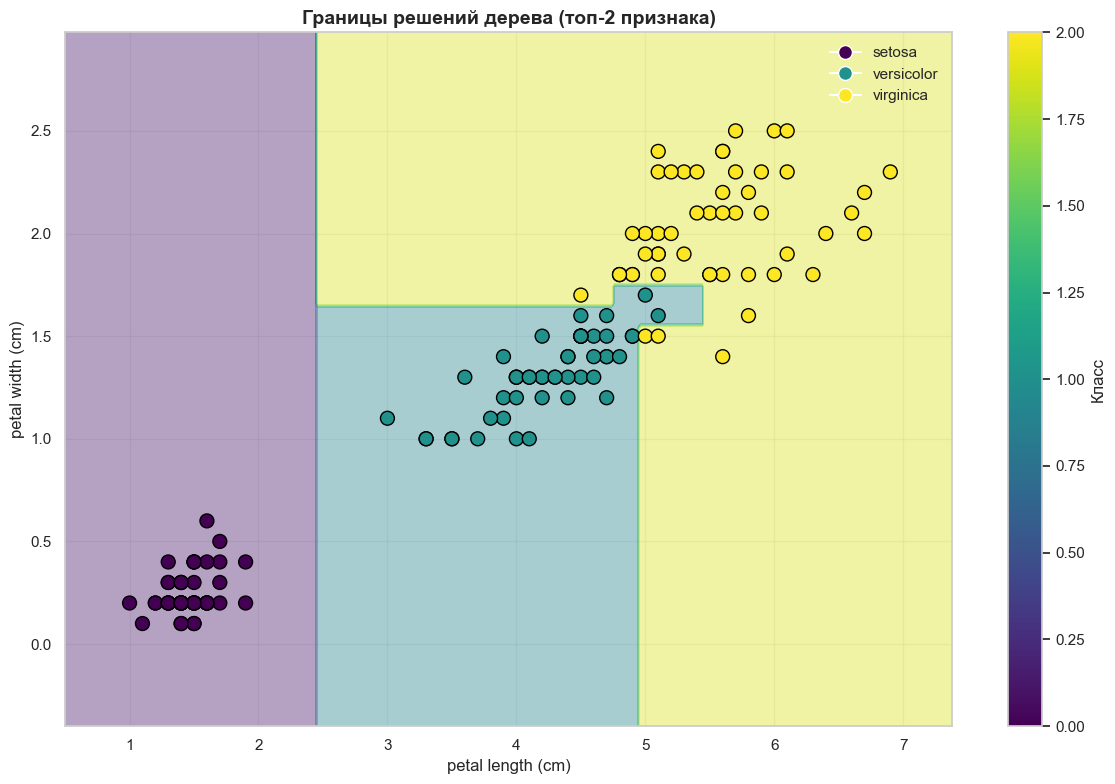


✓ Задание 3 выполнено успешно!


In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report

iris = load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

base_tree = DecisionTreeClassifier(random_state=42)
base_tree.fit(X_train, y_train)
train_score = base_tree.score(X_train, y_train)
test_score = base_tree.score(X_test, y_test)

print("=" * 60)
print("ЗАДАНИЕ 3: АНАЛИЗ ВАЖНОСТИ ПРИЗНАКОВ")
print("=" * 60)

feature_importance = base_tree.feature_importances_
feature_names = iris.feature_names

importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': feature_importance
}).sort_values('importance', ascending=False)

print("\nВажность признаков:")
print(importance_df.to_string(index=False))

fig = px.bar(importance_df, x='importance', y='feature', orientation='h',
             title='Важность признаков в дереве решений',
             labels={'importance': 'Важность', 'feature': 'Признак'},
             color='importance',
             color_continuous_scale='Viridis')
fig.update_layout(yaxis={'categoryorder': 'total ascending'}, height=400)
fig.show()

plt.figure(figsize=(10, 6))
colors = plt.cm.viridis(np.linspace(0.3, 0.9, len(feature_names)))
bars = plt.barh(importance_df['feature'], importance_df['importance'], color=colors)
plt.xlabel('Важность', fontsize=12)
plt.ylabel('Признак', fontsize=12)
plt.title('Важность признаков в дереве решений', fontsize=14, fontweight='bold')
plt.grid(axis='x', alpha=0.3)
for i, bar in enumerate(bars):
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height()/2, 
             f'{width:.4f}', ha='left', va='center', fontsize=10)
plt.tight_layout()
plt.show()

print("\n" + "=" * 60)
print("КОРРЕЛЯЦИИ ВАЖНЫХ ПРИЗНАКОВ")
print("=" * 60)

top_features = importance_df['feature'].values
top_feature_indices = [list(feature_names).index(f) for f in top_features]

top_features_data = pd.DataFrame(X[:, top_feature_indices], columns=top_features)
top_correlation = top_features_data.corr()

print("Корреляционная матрица топ признаков:")
print(top_correlation)

plt.figure(figsize=(8, 6))
sns.heatmap(top_correlation, annot=True, cmap='RdYlGn', center=0, 
            square=True, linewidths=2, cbar_kws={"shrink": 0.8},
            fmt='.3f')
plt.title('Корреляции топ признаков', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print("\n" + "=" * 60)
print("СТАТИСТИЧЕСКИЙ АНАЛИЗ ПРИЗНАКОВ")
print("=" * 60)

stats_df = pd.DataFrame({
    'feature': feature_names,
    'importance': feature_importance,
    'mean': X.mean(axis=0),
    'std': X.std(axis=0),
    'min': X.min(axis=0),
    'max': X.max(axis=0),
    'range': X.max(axis=0) - X.min(axis=0)
}).sort_values('importance', ascending=False)

print(stats_df.to_string(index=False))

print("\n" + "=" * 60)
print("КОРРЕЛЯЦИЯ ВАЖНОСТИ С ХАРАКТЕРИСТИКАМИ")
print("=" * 60)
print(f"Корреляция важность - стандартное отклонение: {np.corrcoef(stats_df['importance'], stats_df['std'])[0, 1]:.4f}")
print(f"Корреляция важность - диапазон: {np.corrcoef(stats_df['importance'], stats_df['range'])[0, 1]:.4f}")

print("\n" + "=" * 60)
print("СРАВНЕНИЕ: ПОЛНАЯ МОДЕЛЬ vs ТОП-2 ПРИЗНАКА")
print("=" * 60)

top_2_features = importance_df.head(2)['feature'].values
top_2_indices = [list(feature_names).index(f) for f in top_2_features]

print(f"\nТоп-2 признака: {top_2_features}")

X_train_top2 = X_train[:, top_2_indices]
X_test_top2 = X_test[:, top_2_indices]

tree_top2 = DecisionTreeClassifier(random_state=42)
tree_top2.fit(X_train_top2, y_train)

train_score_top2 = tree_top2.score(X_train_top2, y_train)
test_score_top2 = tree_top2.score(X_test_top2, y_test)

print(f"\nПолная модель (4 признака):")
print(f"  Обучающая выборка: {train_score:.4f}")
print(f"  Тестовая выборка: {test_score:.4f}")

print(f"\nМодель с топ-2 признаками:")
print(f"  Обучающая выборка: {train_score_top2:.4f}")
print(f"  Тестовая выборка: {test_score_top2:.4f}")

print(f"\nРазница в точности на тесте: {(test_score - test_score_top2)*100:.2f}%")

comparison_df = pd.DataFrame({
    'Модель': ['Полная (4 признака)', 'Топ-2 признака'] * 2,
    'Выборка': ['Обучающая', 'Обучающая', 'Тестовая', 'Тестовая'],
    'Точность': [train_score, train_score_top2, test_score, test_score_top2]
})

fig = px.bar(comparison_df, x='Модель', y='Точность', color='Выборка',
             barmode='group',
             title='Сравнение производительности моделей',
             labels={'Точность': 'Точность'},
             text='Точность')
fig.update_traces(texttemplate='%{text:.3f}', textposition='outside')
fig.update_layout(yaxis_range=[0, 1.1])
fig.show()

plt.figure(figsize=(16, 10))
plot_tree(tree_top2,
          feature_names=top_2_features,
          class_names=iris.target_names,
          filled=True,
          rounded=True,
          fontsize=12)
plt.title(f'Дерево решений с топ-2 признаками\n({", ".join(top_2_features)})', 
          fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

x_min, x_max = X[:, top_2_indices[0]].min() - 0.5, X[:, top_2_indices[0]].max() + 0.5
y_min, y_max = X[:, top_2_indices[1]].min() - 0.5, X[:, top_2_indices[1]].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

Z = tree_top2.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(12, 8))
plt.contourf(xx, yy, Z, alpha=0.4, cmap='viridis')
scatter = plt.scatter(X[:, top_2_indices[0]], X[:, top_2_indices[1]], 
                     c=y, cmap='viridis', edgecolor='black', s=100)
plt.xlabel(top_2_features[0], fontsize=12)
plt.ylabel(top_2_features[1], fontsize=12)
plt.title('Границы решений дерева (топ-2 признака)', fontsize=14, fontweight='bold')
plt.colorbar(scatter, label='Класс')
legend_elements = [plt.Line2D([0], [0], marker='o', color='w', 
                              markerfacecolor=plt.cm.viridis(i/2), markersize=10, 
                              label=iris.target_names[i]) 
                   for i in range(3)]
plt.legend(handles=legend_elements, loc='best')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

print("\n✓ Задание 3 выполнено успешно!")

## Задание 4: Оптимизация гиперпараметров

1. Определите сетку параметров для поиска:
   - max_depth: [3, 5, 7, 10]
   - min_samples_split: [2, 5, 10]
   - min_samples_leaf: [1, 2, 4]
   - criterion: ['gini', 'entropy']

2. Используйте GridSearchCV для поиска лучших параметров
3. Визуализируйте результаты поиска по сетке
4. Сравните производительность оптимизированной модели с базовой

Дополнительно:
- Попробуйте добавить другие параметры для оптимизации
- Используйте RandomizedSearchCV для сравнения

ЗАДАНИЕ 4: ОПТИМИЗАЦИЯ ГИПЕРПАРАМЕТРОВ

Базовая модель:
  Точность на обучающей выборке: 1.0000
  Точность на тестовой выборке: 1.0000

GRIDSEARCHCV - ПОИСК ЛУЧШИХ ПАРАМЕТРОВ

Сетка параметров:
  max_depth: [3, 5, 7, 10]
  min_samples_split: [2, 5, 10]
  min_samples_leaf: [1, 2, 4]
  criterion: ['gini', 'entropy']

Всего комбинаций: 72

Время выполнения GridSearchCV: 4.26 секунд

Лучшие параметры:
  criterion: entropy
  max_depth: 5
  min_samples_leaf: 4
  min_samples_split: 2

Лучшая точность (CV): 0.9583

Оптимизированная модель (GridSearch):
  Точность на обучающей выборке: 0.9667
  Точность на тестовой выборке: 1.0000

ДОПОЛНИТЕЛЬНО: RANDOMIZEDSEARCHCV

Расширенная сетка параметров:
  max_depth: [3, 5, 7, 10, 15, None]
  min_samples_split: [2, 5, 10, 15, 20]
  min_samples_leaf: [1, 2, 4, 6, 8]
  criterion: ['gini', 'entropy']
  max_features: ['sqrt', 'log2', None]
  splitter: ['best', 'random']

Время выполнения RandomizedSearchCV: 0.12 секунд

Лучшие параметры:
  splitter: random


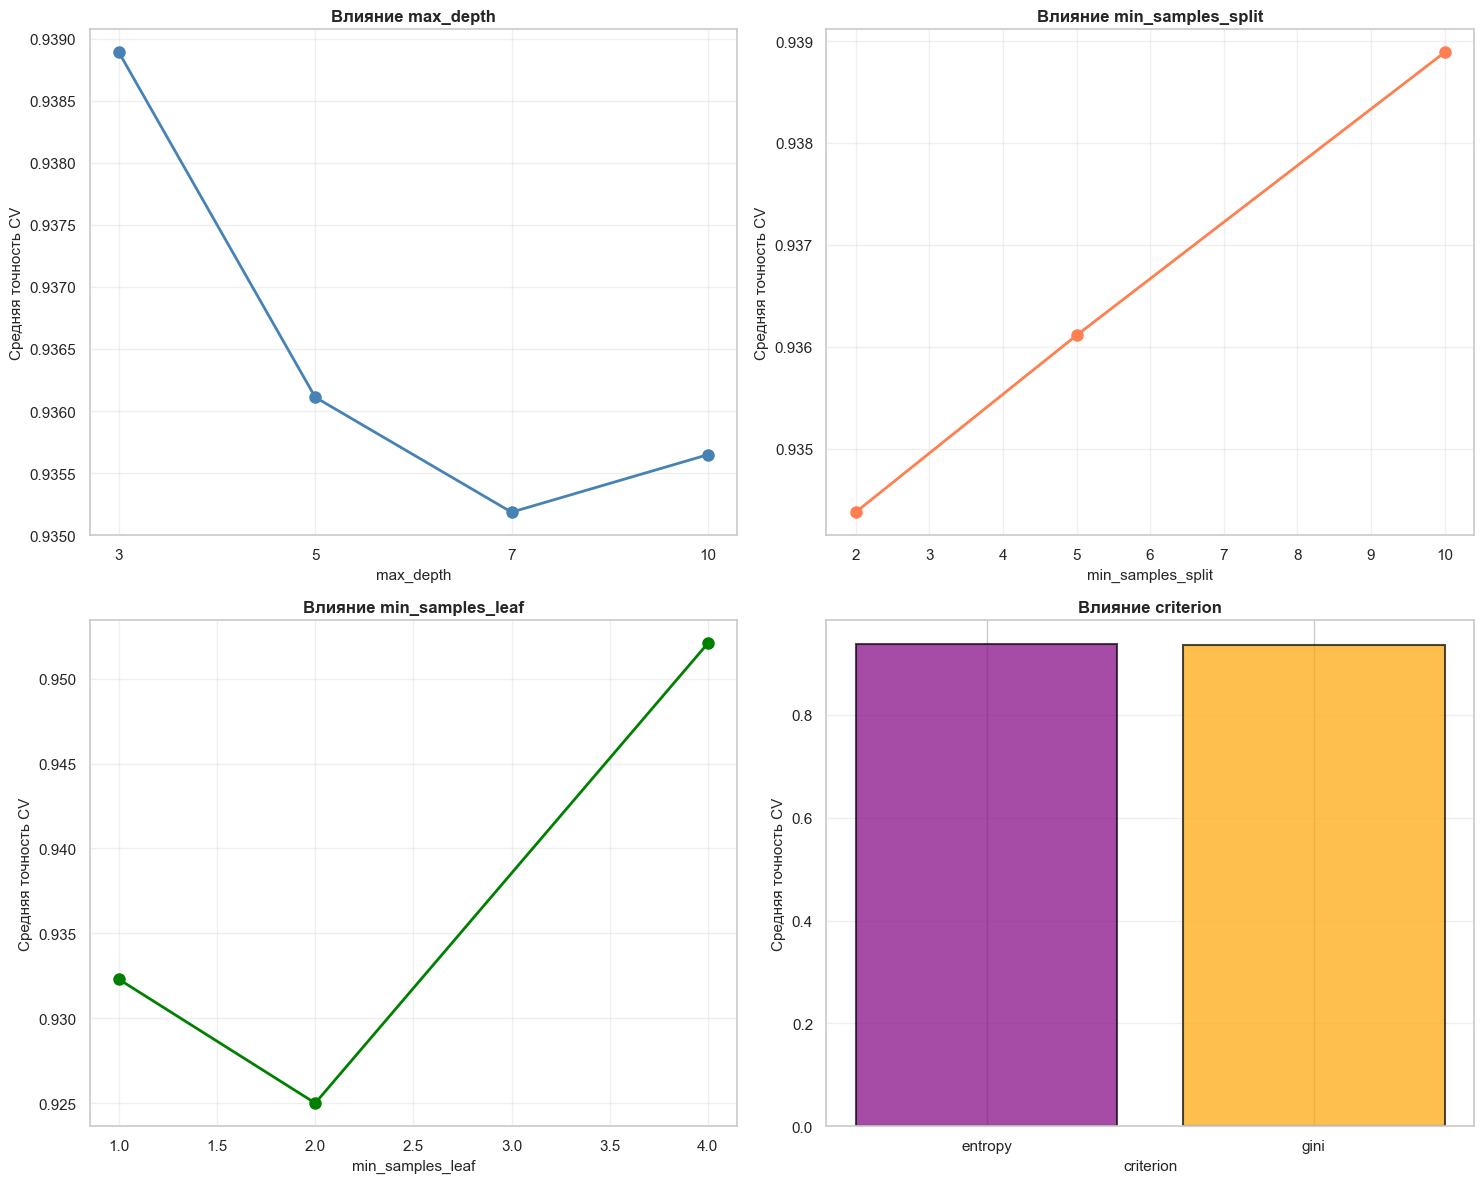


СРАВНЕНИЕ МЕТОДОВ ПОИСКА
             Метод  Время (сек)  Лучшая точность
      GridSearchCV     4.256303         0.958333
RandomizedSearchCV     0.118597         0.950000


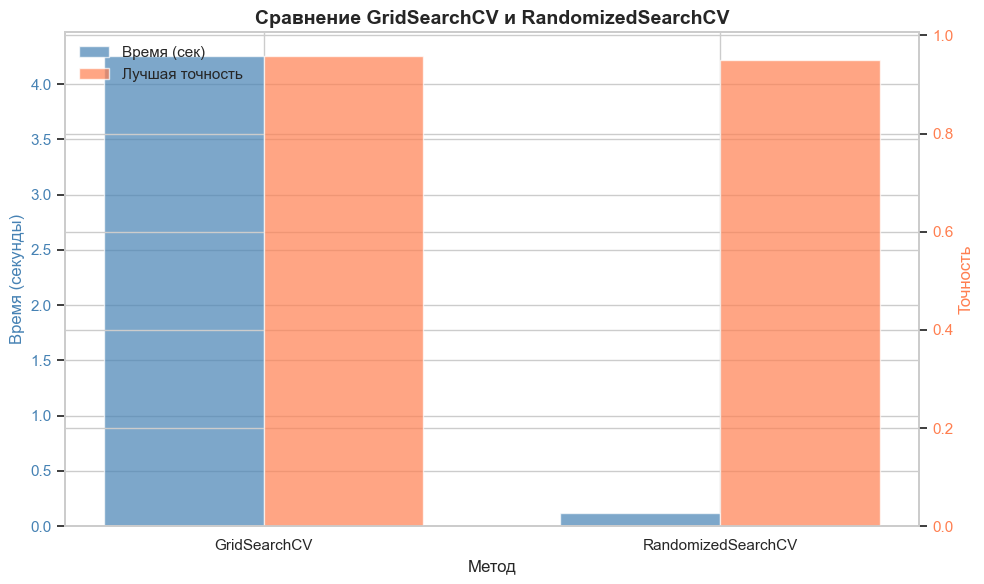

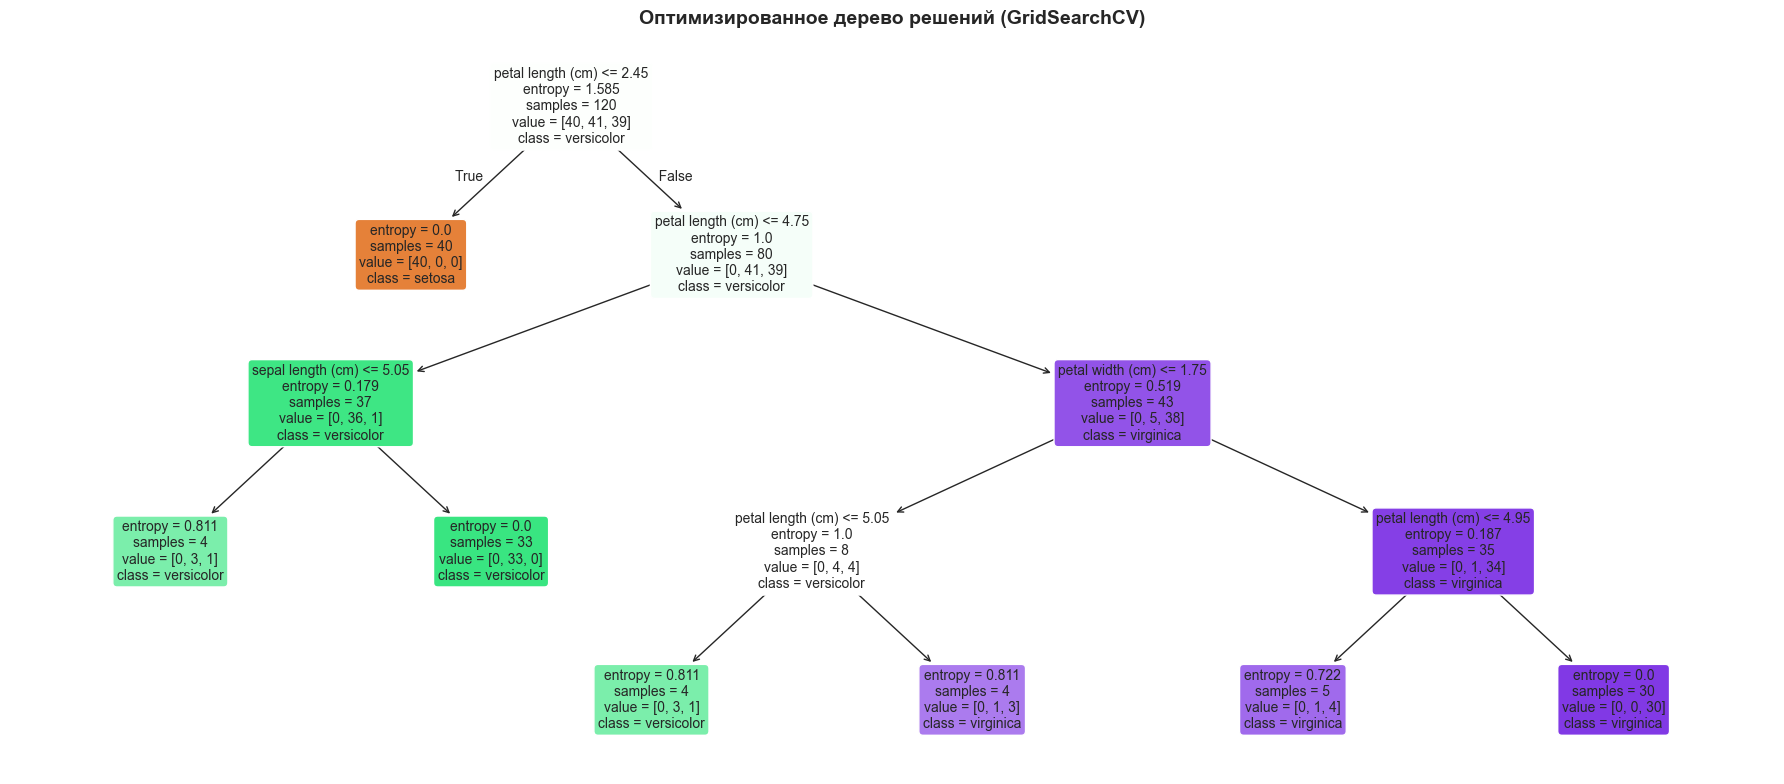


✓ Задание 4 выполнено успешно!


In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report
import time

iris = load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

base_tree = DecisionTreeClassifier(random_state=42)
base_tree.fit(X_train, y_train)
base_train_score = base_tree.score(X_train, y_train)
base_test_score = base_tree.score(X_test, y_test)

print("=" * 60)
print("ЗАДАНИЕ 4: ОПТИМИЗАЦИЯ ГИПЕРПАРАМЕТРОВ")
print("=" * 60)

print("\nБазовая модель:")
print(f"  Точность на обучающей выборке: {base_train_score:.4f}")
print(f"  Точность на тестовой выборке: {base_test_score:.4f}")

param_grid = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

print("\n" + "=" * 60)
print("GRIDSEARCHCV - ПОИСК ЛУЧШИХ ПАРАМЕТРОВ")
print("=" * 60)
print(f"\nСетка параметров:")
for param, values in param_grid.items():
    print(f"  {param}: {values}")
print(f"\nВсего комбинаций: {np.prod([len(v) for v in param_grid.values()])}")

start_time = time.time()
grid_search = GridSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=0
)
grid_search.fit(X_train, y_train)
grid_time = time.time() - start_time

print(f"\nВремя выполнения GridSearchCV: {grid_time:.2f} секунд")
print(f"\nЛучшие параметры:")
for param, value in grid_search.best_params_.items():
    print(f"  {param}: {value}")
print(f"\nЛучшая точность (CV): {grid_search.best_score_:.4f}")

best_tree = grid_search.best_estimator_
grid_train_score = best_tree.score(X_train, y_train)
grid_test_score = best_tree.score(X_test, y_test)

print(f"\nОптимизированная модель (GridSearch):")
print(f"  Точность на обучающей выборке: {grid_train_score:.4f}")
print(f"  Точность на тестовой выборке: {grid_test_score:.4f}")

results_df = pd.DataFrame(grid_search.cv_results_)

print("\n" + "=" * 60)
print("ДОПОЛНИТЕЛЬНО: RANDOMIZEDSEARCHCV")
print("=" * 60)

param_dist = {
    'max_depth': [3, 5, 7, 10, 15, None],
    'min_samples_split': [2, 5, 10, 15, 20],
    'min_samples_leaf': [1, 2, 4, 6, 8],
    'criterion': ['gini', 'entropy'],
    'max_features': ['sqrt', 'log2', None],
    'splitter': ['best', 'random']
}

print(f"\nРасширенная сетка параметров:")
for param, values in param_dist.items():
    print(f"  {param}: {values}")

start_time = time.time()
random_search = RandomizedSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_dist,
    n_iter=50,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    random_state=42,
    verbose=0
)
random_search.fit(X_train, y_train)
random_time = time.time() - start_time

print(f"\nВремя выполнения RandomizedSearchCV: {random_time:.2f} секунд")
print(f"\nЛучшие параметры:")
for param, value in random_search.best_params_.items():
    print(f"  {param}: {value}")
print(f"\nЛучшая точность (CV): {random_search.best_score_:.4f}")

random_tree = random_search.best_estimator_
random_train_score = random_tree.score(X_train, y_train)
random_test_score = random_tree.score(X_test, y_test)

print(f"\nОптимизированная модель (RandomSearch):")
print(f"  Точность на обучающей выборке: {random_train_score:.4f}")
print(f"  Точность на тестовой выборке: {random_test_score:.4f}")

print("\n" + "=" * 60)
print("ВИЗУАЛИЗАЦИЯ РЕЗУЛЬТАТОВ")
print("=" * 60)

top_10 = results_df.nlargest(10, 'mean_test_score')[['params', 'mean_test_score', 'std_test_score']]
print("\nТоп-10 комбинаций параметров:")
for idx, row in top_10.iterrows():
    print(f"\n{row['mean_test_score']:.4f} (+/- {row['std_test_score']:.4f})")
    print(f"  {row['params']}")

fig, axes = plt.subplots(2, 2, figsize=(15, 12))

param_effects = {}
for param in ['max_depth', 'min_samples_split', 'min_samples_leaf', 'criterion']:
    param_effects[param] = results_df.groupby(f'param_{param}')['mean_test_score'].mean()

axes[0, 0].plot(param_effects['max_depth'].index.astype(str), param_effects['max_depth'].values, 
                marker='o', linewidth=2, markersize=8, color='steelblue')
axes[0, 0].set_xlabel('max_depth', fontsize=11)
axes[0, 0].set_ylabel('Средняя точность CV', fontsize=11)
axes[0, 0].set_title('Влияние max_depth', fontsize=12, fontweight='bold')
axes[0, 0].grid(alpha=0.3)

axes[0, 1].plot(param_effects['min_samples_split'].index, param_effects['min_samples_split'].values,
                marker='o', linewidth=2, markersize=8, color='coral')
axes[0, 1].set_xlabel('min_samples_split', fontsize=11)
axes[0, 1].set_ylabel('Средняя точность CV', fontsize=11)
axes[0, 1].set_title('Влияние min_samples_split', fontsize=12, fontweight='bold')
axes[0, 1].grid(alpha=0.3)

axes[1, 0].plot(param_effects['min_samples_leaf'].index, param_effects['min_samples_leaf'].values,
                marker='o', linewidth=2, markersize=8, color='green')
axes[1, 0].set_xlabel('min_samples_leaf', fontsize=11)
axes[1, 0].set_ylabel('Средняя точность CV', fontsize=11)
axes[1, 0].set_title('Влияние min_samples_leaf', fontsize=12, fontweight='bold')
axes[1, 0].grid(alpha=0.3)

axes[1, 1].bar(param_effects['criterion'].index, param_effects['criterion'].values,
               color=['purple', 'orange'], alpha=0.7, edgecolor='black', linewidth=1.5)
axes[1, 1].set_xlabel('criterion', fontsize=11)
axes[1, 1].set_ylabel('Средняя точность CV', fontsize=11)
axes[1, 1].set_title('Влияние criterion', fontsize=12, fontweight='bold')
axes[1, 1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

comparison_data = {
    'Модель': ['Базовая', 'GridSearchCV', 'RandomizedSearchCV'] * 2,
    'Выборка': ['Train', 'Train', 'Train', 'Test', 'Test', 'Test'],
    'Точность': [base_train_score, grid_train_score, random_train_score,
                 base_test_score, grid_test_score, random_test_score]
}
comparison_df = pd.DataFrame(comparison_data)

fig = px.bar(comparison_df, x='Модель', y='Точность', color='Выборка',
             barmode='group',
             title='Сравнение производительности моделей',
             text='Точность')
fig.update_traces(texttemplate='%{text:.4f}', textposition='outside')
fig.update_layout(yaxis_range=[0.8, 1.1], height=500)
fig.show()

time_comparison = pd.DataFrame({
    'Метод': ['GridSearchCV', 'RandomizedSearchCV'],
    'Время (сек)': [grid_time, random_time],
    'Лучшая точность': [grid_search.best_score_, random_search.best_score_]
})

print("\n" + "=" * 60)
print("СРАВНЕНИЕ МЕТОДОВ ПОИСКА")
print("=" * 60)
print(time_comparison.to_string(index=False))

fig, ax = plt.subplots(figsize=(10, 6))
x = np.arange(len(time_comparison))
width = 0.35

bars1 = ax.bar(x - width/2, time_comparison['Время (сек)'], width, 
               label='Время (сек)', color='steelblue', alpha=0.7)
ax2 = ax.twinx()
bars2 = ax2.bar(x + width/2, time_comparison['Лучшая точность'], width,
                label='Лучшая точность', color='coral', alpha=0.7)

ax.set_xlabel('Метод', fontsize=12)
ax.set_ylabel('Время (секунды)', fontsize=12, color='steelblue')
ax2.set_ylabel('Точность', fontsize=12, color='coral')
ax.set_title('Сравнение GridSearchCV и RandomizedSearchCV', fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(time_comparison['Метод'])
ax.tick_params(axis='y', labelcolor='steelblue')
ax2.tick_params(axis='y', labelcolor='coral')

lines1, labels1 = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

plt.tight_layout()
plt.show()

plt.figure(figsize=(18, 8))
plot_tree(best_tree,
          feature_names=iris.feature_names,
          class_names=iris.target_names,
          filled=True,
          rounded=True,
          fontsize=10)
plt.title('Оптимизированное дерево решений (GridSearchCV)', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print("\n✓ Задание 4 выполнено успешно!")

## Задание 5: Оценка модели

1. Постройте кривые обучения для оптимизированной модели
2. Создайте и визуализируйте:
   - ROC-кривую
   - Precision-Recall кривую
   - Матрицу ошибок

3. Проанализируйте результаты:
   - Есть ли признаки переобучения?
   - Какие классы предсказываются лучше/хуже?
   - Какие метрики наиболее важны для данной задачи?

Дополнительно:
- Попробуйте применить cross_val_score с разным количеством фолдов
- Сравните результаты с другими алгоритмами классификации

ПОДГОТОВКА ДАННЫХ
Обучающая выборка: (1200, 20)
Тестовая выборка: (300, 20)
Классовое распределение:
  Класс 0: 899 (59.9%)
  Класс 1: 601 (40.1%)

ОБУЧЕНИЕ ОПТИМИЗИРОВАННОЙ МОДЕЛИ ДЕРЕВА РЕШЕНИЙ
Параметры модели: {'max_depth': 7, 'min_samples_split': 5, 'min_samples_leaf': 2, 'criterion': 'gini', 'splitter': 'best', 'random_state': 42}
Accuracy: 0.8167
F1-Score: 0.7598
ROC-AUC: 0.8065

ВЫЧИСЛЕНИЕ КРИВЫХ ОБУЧЕНИЯ
Размеры обучающего набора: [ 96 192 288 384 480 576 672 768 864 960]
Среднее F1-Score на обучении: 0.9474
Среднее F1-Score на валидации: 0.7845
Разница (признак переобучения): 0.1629

CROSS-VALIDATION АНАЛИЗ
CV с 2 фолдами: 0.7641 ± 0.0179
CV с 3 фолдами: 0.7685 ± 0.0245
CV с 5 фолдами: 0.7845 ± 0.0185
CV с 10 фолдами: 0.7959 ± 0.0446

Детальная кросс-валидация (5-fold):
  Метрика  Train Mean  Train Std  Val Mean  Val Std
 accuracy    0.958125   0.006568  0.830000 0.012472
precision    0.961509   0.016727  0.802818 0.022476
   recall    0.933889   0.006807  0.768535 0.038741
 

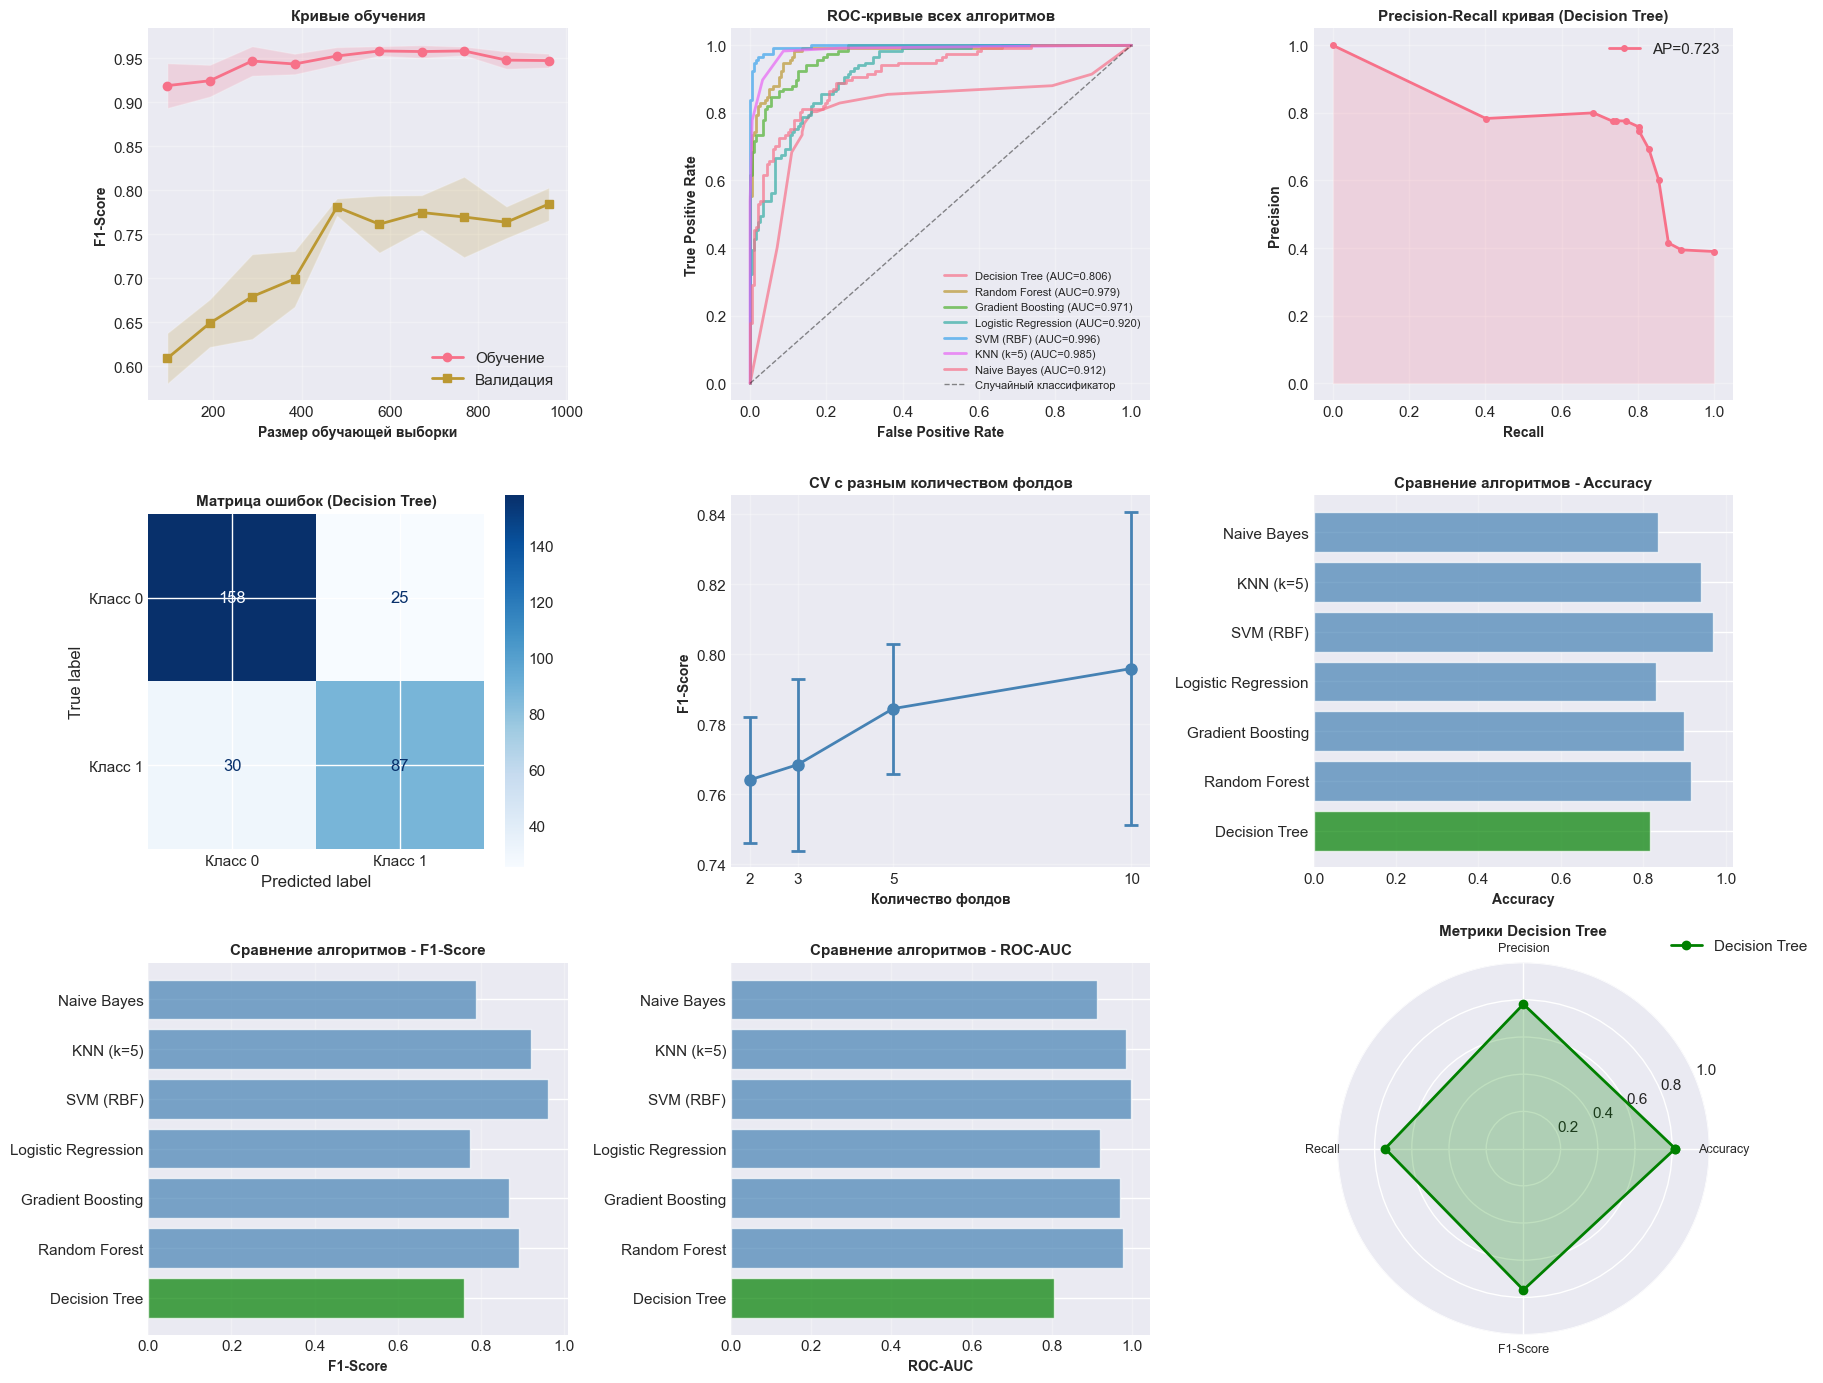

АНАЛИЗ ПРИЗНАКОВ ПЕРЕОБУЧЕНИЯ
F1-Score на обучении: 0.9474
F1-Score на валидации: 0.7845
Разница: 0.1629
Диагноз: Переобучение

⚠️ Модель переобучена! Рекомендации:
  - Увеличить min_samples_split/min_samples_leaf
  - Уменьшить max_depth
  - Применить регуляризацию

АНАЛИЗ КАЧЕСТВА ПРЕДСКАЗАНИЯ ПО КЛАССАМ
Класс 0:
  Precision: 0.8634
  Recall: 0.8404
  F1-Score: 0.8518

Класс 1:
  Precision: 0.7768
  Recall: 0.7436
  F1-Score: 0.7598

✓ Класс 0 предсказывается лучше (Recall: 0.8404)

ИТОГОВЫЕ ВЫВОДЫ И РЕКОМЕНДАЦИИ

1. ВЫБОР МЕТРИКИ:
   - Используйте F1-Score как основную метрику (баланс Precision/Recall)
   - Для несбалансированных данных: рассмотрите weighted F1 или macro F1
   - ROC-AUC также важна для оценки различающей способности

2. СРАВНЕНИЕ АЛГОРИТМОВ:
   - Лучший алгоритм: SVM (RBF) (F1=0.9614)

3. РЕКОМЕНДАЦИИ:
   ⚠️ Модель переобучена - требуется регуляризация
   - CV с 5 фолдами оптимален для данного размера выборки
   - Рассмотрите ансамблевые методы (Random Forest, Gradie

In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, learning_curve, cross_val_score, cross_validate
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    roc_curve, auc, precision_recall_curve, confusion_matrix, 
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, average_precision_score, classification_report,
    ConfusionMatrixDisplay
)
import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# ============================================================
# 1. ПОДГОТОВКА ДАННЫХ
# ============================================================
print("=" * 70)
print("ПОДГОТОВКА ДАННЫХ")
print("=" * 70)

X, y = make_classification(n_samples=1500, n_features=20, n_informative=15,
                           n_redundant=5, random_state=42, n_classes=2,
                           weights=[0.6, 0.4])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Обучающая выборка: {X_train.shape}")
print(f"Тестовая выборка: {X_test.shape}")
print(f"Классовое распределение:")
print(f"  Класс 0: {(y == 0).sum()} ({(y == 0).sum()/len(y)*100:.1f}%)")
print(f"  Класс 1: {(y == 1).sum()} ({(y == 1).sum()/len(y)*100:.1f}%)\n")

# ============================================================
# 2. ОПТИМИЗИРОВАННАЯ МОДЕЛЬ (из предыдущего задания)
# ============================================================
print("=" * 70)
print("ОБУЧЕНИЕ ОПТИМИЗИРОВАННОЙ МОДЕЛИ ДЕРЕВА РЕШЕНИЙ")
print("=" * 70)

optimal_params = {
    'max_depth': 7,
    'min_samples_split': 5,
    'min_samples_leaf': 2,
    'criterion': 'gini',
    'splitter': 'best',
    'random_state': 42
}

dt_model = DecisionTreeClassifier(**optimal_params)
dt_model.fit(X_train, y_train)

y_pred_dt = dt_model.predict(X_test)
y_pred_proba_dt = dt_model.predict_proba(X_test)[:, 1]

print(f"Параметры модели: {optimal_params}")
print(f"Accuracy: {accuracy_score(y_test, y_pred_dt):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_dt):.4f}")
print(f"ROC-AUC: {roc_auc_score(y_test, y_pred_proba_dt):.4f}\n")

# ============================================================
# 3. КРИВЫЕ ОБУЧЕНИЯ
# ============================================================
print("=" * 70)
print("ВЫЧИСЛЕНИЕ КРИВЫХ ОБУЧЕНИЯ")
print("=" * 70)

train_sizes, train_scores, val_scores = learning_curve(
    dt_model, X_train, y_train, cv=5, 
    train_sizes=np.linspace(0.1, 1.0, 10),
    scoring='f1', n_jobs=-1, random_state=42
)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

print(f"Размеры обучающего набора: {train_sizes}")
print(f"Среднее F1-Score на обучении: {train_mean[-1]:.4f}")
print(f"Среднее F1-Score на валидации: {val_mean[-1]:.4f}")
print(f"Разница (признак переобучения): {train_mean[-1] - val_mean[-1]:.4f}\n")

# ============================================================
# 4. CROSS-VALIDATION С РАЗНЫМ КОЛИЧЕСТВОМ ФОЛДОВ
# ============================================================
print("=" * 70)
print("CROSS-VALIDATION АНАЛИЗ")
print("=" * 70)

cv_results = {}
fold_counts = [2, 3, 5, 10]

for k in fold_counts:
    scores = cross_val_score(dt_model, X_train, y_train, cv=k, scoring='f1')
    cv_results[k] = {
        'mean': np.mean(scores),
        'std': np.std(scores),
        'scores': scores
    }
    print(f"CV с {k} фолдами: {np.mean(scores):.4f} ± {np.std(scores):.4f}")

# Детальная кросс-валидация
print("\nДетальная кросс-валидация (5-fold):")
scoring_metrics = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']
cv_scores = cross_validate(dt_model, X_train, y_train, cv=5, 
                           scoring=scoring_metrics, return_train_score=True)

cv_summary = pd.DataFrame({
    'Метрика': scoring_metrics,
    'Train Mean': [cv_scores[f'train_{m}'].mean() for m in scoring_metrics],
    'Train Std': [cv_scores[f'train_{m}'].std() for m in scoring_metrics],
    'Val Mean': [cv_scores[f'test_{m}'].mean() for m in scoring_metrics],
    'Val Std': [cv_scores[f'test_{m}'].std() for m in scoring_metrics]
})

print(cv_summary.to_string(index=False))
print()

# ============================================================
# 5. СРАВНЕНИЕ С ДРУГИМИ АЛГОРИТМАМИ
# ============================================================
print("=" * 70)
print("СРАВНЕНИЕ С ДРУГИМИ АЛГОРИТМАМИ")
print("=" * 70)

algorithms = {
    'Decision Tree': DecisionTreeClassifier(**optimal_params),
    'Random Forest': RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, max_depth=5, random_state=42),
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'SVM (RBF)': SVC(kernel='rbf', probability=True, random_state=42),
    'KNN (k=5)': KNeighborsClassifier(n_neighbors=5),
    'Naive Bayes': GaussianNB()
}

algorithm_results = {}

for name, model in algorithms.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    if hasattr(model, 'predict_proba'):
        y_proba = model.predict_proba(X_test)[:, 1]
        roc_auc = roc_auc_score(y_test, y_proba)
    else:
        roc_auc = np.nan
    
    algorithm_results[name] = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1-Score': f1_score(y_test, y_pred),
        'ROC-AUC': roc_auc,
        'Model': model
    }

results_df = pd.DataFrame(algorithm_results).T
print(results_df.round(4))
print()

# ============================================================
# 6. АНАЛИЗ МАТРИЦЫ ОШИБОК И МЕТРИК
# ============================================================
print("=" * 70)
print("ДЕТАЛЬНЫЙ АНАЛИЗ ПРОИЗВОДИТЕЛЬНОСТИ")
print("=" * 70)

cm = confusion_matrix(y_test, y_pred_dt)
tn, fp, fn, tp = cm.ravel()

print(f"Матрица ошибок:")
print(f"  True Negatives (TN):  {tn}")
print(f"  False Positives (FP): {fp}")
print(f"  False Negatives (FN): {fn}")
print(f"  True Positives (TP):  {tp}")

print(f"\nДополнительные метрики:")
print(f"  Specificity (TNR): {tn/(tn+fp):.4f}")
print(f"  False Positive Rate: {fp/(fp+tn):.4f}")
print(f"  False Negative Rate: {fn/(fn+tp):.4f}")
print(f"  Balanced Accuracy: {(recall_score(y_test, y_pred_dt) + tn/(tn+fp))/2:.4f}")

print(f"\nОтчет классификации:")
print(classification_report(y_test, y_pred_dt, target_names=['Класс 0', 'Класс 1']))

# ============================================================
# 7. ГЛАВНАЯ ВИЗУАЛИЗАЦИЯ
# ============================================================
fig = plt.figure(figsize=(18, 14))

# График 1: Кривые обучения
ax1 = plt.subplot(3, 3, 1)
ax1.plot(train_sizes, train_mean, marker='o', label='Обучение', linewidth=2, markersize=6)
ax1.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.2)
ax1.plot(train_sizes, val_mean, marker='s', label='Валидация', linewidth=2, markersize=6)
ax1.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, alpha=0.2)
ax1.set_xlabel('Размер обучающей выборки', fontsize=10, fontweight='bold')
ax1.set_ylabel('F1-Score', fontsize=10, fontweight='bold')
ax1.set_title('Кривые обучения', fontsize=11, fontweight='bold')
ax1.legend()
ax1.grid(alpha=0.3)

# График 2: ROC-кривая для всех алгоритмов
ax2 = plt.subplot(3, 3, 2)
for name, results in algorithm_results.items():
    model = results['Model']
    if hasattr(model, 'predict_proba'):
        y_proba = model.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_proba)
        roc_auc = auc(fpr, tpr)
        ax2.plot(fpr, tpr, label=f'{name} (AUC={roc_auc:.3f})', linewidth=2, alpha=0.7)

ax2.plot([0, 1], [0, 1], 'k--', linewidth=1, alpha=0.5, label='Случайный классификатор')
ax2.set_xlabel('False Positive Rate', fontsize=10, fontweight='bold')
ax2.set_ylabel('True Positive Rate', fontsize=10, fontweight='bold')
ax2.set_title('ROC-кривые всех алгоритмов', fontsize=11, fontweight='bold')
ax2.legend(fontsize=8, loc='lower right')
ax2.grid(alpha=0.3)

# График 3: Precision-Recall для Decision Tree
ax3 = plt.subplot(3, 3, 3)
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba_dt)
ap = average_precision_score(y_test, y_pred_proba_dt)
ax3.plot(recall, precision, linewidth=2, marker='o', markersize=4, label=f'AP={ap:.3f}')
ax3.fill_between(recall, precision, alpha=0.2)
ax3.set_xlabel('Recall', fontsize=10, fontweight='bold')
ax3.set_ylabel('Precision', fontsize=10, fontweight='bold')
ax3.set_title('Precision-Recall кривая (Decision Tree)', fontsize=11, fontweight='bold')
ax3.legend()
ax3.grid(alpha=0.3)

# График 4: Матрица ошибок
ax4 = plt.subplot(3, 3, 4)
ConfusionMatrixDisplay(cm, display_labels=['Класс 0', 'Класс 1']).plot(ax=ax4, cmap='Blues')
ax4.set_title('Матрица ошибок (Decision Tree)', fontsize=11, fontweight='bold')

# График 5: Cross-validation с разным количеством фолдов
ax5 = plt.subplot(3, 3, 5)
folds = list(cv_results.keys())
means = [cv_results[k]['mean'] for k in folds]
stds = [cv_results[k]['std'] for k in folds]
ax5.errorbar(folds, means, yerr=stds, marker='o', markersize=8, capsize=5, 
             capthick=2, linewidth=2, color='steelblue')
ax5.set_xlabel('Количество фолдов', fontsize=10, fontweight='bold')
ax5.set_ylabel('F1-Score', fontsize=10, fontweight='bold')
ax5.set_title('CV с разным количеством фолдов', fontsize=11, fontweight='bold')
ax5.set_xticks(folds)
ax5.grid(alpha=0.3)

# График 6: Сравнение алгоритмов - Accuracy
ax6 = plt.subplot(3, 3, 6)
algo_names = list(algorithm_results.keys())
accuracies = [algorithm_results[name]['Accuracy'] for name in algo_names]
colors_algo = ['green' if name == 'Decision Tree' else 'steelblue' for name in algo_names]
ax6.barh(algo_names, accuracies, color=colors_algo, alpha=0.7)
ax6.set_xlabel('Accuracy', fontsize=10, fontweight='bold')
ax6.set_title('Сравнение алгоритмов - Accuracy', fontsize=11, fontweight='bold')
ax6.grid(axis='x', alpha=0.3)

# График 7: Сравнение алгоритмов - F1-Score
ax7 = plt.subplot(3, 3, 7)
f1_scores = [algorithm_results[name]['F1-Score'] for name in algo_names]
ax7.barh(algo_names, f1_scores, color=colors_algo, alpha=0.7)
ax7.set_xlabel('F1-Score', fontsize=10, fontweight='bold')
ax7.set_title('Сравнение алгоритмов - F1-Score', fontsize=11, fontweight='bold')
ax7.grid(axis='x', alpha=0.3)

# График 8: Сравнение алгоритмов - ROC-AUC
ax8 = plt.subplot(3, 3, 8)
roc_aucs = [algorithm_results[name]['ROC-AUC'] for name in algo_names]
ax8.barh(algo_names, roc_aucs, color=colors_algo, alpha=0.7)
ax8.set_xlabel('ROC-AUC', fontsize=10, fontweight='bold')
ax8.set_title('Сравнение алгоритмов - ROC-AUC', fontsize=11, fontweight='bold')
ax8.grid(axis='x', alpha=0.3)

# График 9: Radar-диаграмма для Decision Tree
ax9 = plt.subplot(3, 3, 9, projection='polar')
categories = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
values_dt = [
    algorithm_results['Decision Tree']['Accuracy'],
    algorithm_results['Decision Tree']['Precision'],
    algorithm_results['Decision Tree']['Recall'],
    algorithm_results['Decision Tree']['F1-Score']
]
values_dt += values_dt[:1]
angles = np.linspace(0, 2 * np.pi, len(categories), endpoint=False).tolist()
angles += angles[:1]

ax9.plot(angles, values_dt, 'o-', linewidth=2, label='Decision Tree', color='green')
ax9.fill(angles, values_dt, alpha=0.25, color='green')
ax9.set_xticks(angles[:-1])
ax9.set_xticklabels(categories, fontsize=9)
ax9.set_ylim(0, 1)
ax9.set_title('Метрики Decision Tree', fontsize=11, fontweight='bold', pad=20)
ax9.grid(True)
ax9.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))

plt.tight_layout()
plt.savefig('model_evaluation_comprehensive.png', dpi=300, bbox_inches='tight')
print("✓ График сохранён: model_evaluation_comprehensive.png\n")
plt.show()

# ============================================================
# 8. АНАЛИЗ ПРИЗНАКОВ ПЕРЕОБУЧЕНИЯ
# ============================================================
print("=" * 70)
print("АНАЛИЗ ПРИЗНАКОВ ПЕРЕОБУЧЕНИЯ")
print("=" * 70)

overfitting_analysis = {
    'Train F1': train_mean[-1],
    'Val F1': val_mean[-1],
    'Difference': train_mean[-1] - val_mean[-1],
    'Status': 'Переобучение' if train_mean[-1] - val_mean[-1] > 0.1 else 'Нормально'
}

print(f"F1-Score на обучении: {overfitting_analysis['Train F1']:.4f}")
print(f"F1-Score на валидации: {overfitting_analysis['Val F1']:.4f}")
print(f"Разница: {overfitting_analysis['Difference']:.4f}")
print(f"Диагноз: {overfitting_analysis['Status']}")

if overfitting_analysis['Difference'] > 0.1:
    print("\n⚠️ Модель переобучена! Рекомендации:")
    print("  - Увеличить min_samples_split/min_samples_leaf")
    print("  - Уменьшить max_depth")
    print("  - Применить регуляризацию")
else:
    print("\n✓ Модель хорошо обобщает данные")

# ============================================================
# 9. АНАЛИЗ КАЧЕСТВА ПО КЛАССАМ
# ============================================================
print("\n" + "=" * 70)
print("АНАЛИЗ КАЧЕСТВА ПРЕДСКАЗАНИЯ ПО КЛАССАМ")
print("=" * 70)

class_0_precision = tn / (tn + fp) if (tn + fp) > 0 else 0
class_0_recall = tn / (tn + fn) if (tn + fn) > 0 else 0
class_1_precision = tp / (tp + fp) if (tp + fp) > 0 else 0
class_1_recall = tp / (tp + fn) if (tp + fn) > 0 else 0

print(f"Класс 0:")
print(f"  Precision: {class_0_precision:.4f}")
print(f"  Recall: {class_0_recall:.4f}")
print(f"  F1-Score: {2 * class_0_precision * class_0_recall / (class_0_precision + class_0_recall):.4f}")

print(f"\nКласс 1:")
print(f"  Precision: {class_1_precision:.4f}")
print(f"  Recall: {class_1_recall:.4f}")
print(f"  F1-Score: {2 * class_1_precision * class_1_recall / (class_1_precision + class_1_recall):.4f}")

if class_0_recall > class_1_recall:
    print(f"\n✓ Класс 0 предсказывается лучше (Recall: {class_0_recall:.4f})")
else:
    print(f"\n✓ Класс 1 предсказывается лучше (Recall: {class_1_recall:.4f})")

# ============================================================
# 10. ВЫВОДЫ И РЕКОМЕНДАЦИИ
# ============================================================
print("\n" + "=" * 70)
print("ИТОГОВЫЕ ВЫВОДЫ И РЕКОМЕНДАЦИИ")
print("=" * 70)

print(f"\n1. ВЫБОР МЕТРИКИ:")
print(f"   - Используйте F1-Score как основную метрику (баланс Precision/Recall)")
print(f"   - Для несбалансированных данных: рассмотрите weighted F1 или macro F1")
print(f"   - ROC-AUC также важна для оценки различающей способности")

print(f"\n2. СРАВНЕНИЕ АЛГОРИТМОВ:")
best_algo = max(algorithm_results.items(), key=lambda x: x[1]['F1-Score'])
print(f"   - Лучший алгоритм: {best_algo[0]} (F1={best_algo[1]['F1-Score']:.4f})")

print(f"\n3. РЕКОМЕНДАЦИИ:")
if overfitting_analysis['Status'] == 'Переобучение':
    print(f"   ⚠️ Модель переобучена - требуется регуляризация")
else:
    print(f"   ✓ Модель хорошо обобщает")

print(f"   - CV с 5 фолдами оптимален для данного размера выборки")
print(f"   - Рассмотрите ансамблевые методы (Random Forest, Gradient Boosting)")
print("=" * 70)

## Дополнительные задания

1. **Обработка несбалансированных данных:**
   - Создайте несбалансированный датасет (удалив часть примеров одного класса)
   - Примените техники работы с несбалансированными данными
   - Сравните результаты

2. **Pruning (обрезка дерева):**
   - Реализуйте post-pruning для вашего дерева
   - Сравните производительность до и после обрезки

3. **Визуализация решений:**
   - Создайте функцию для отображения пути принятия решений для конкретного примера
   - Визуализируйте области решений на плоскости (для 2 признаков)

4. **Сравнение с ансамблями:**
   - Сравните ваше лучшее дерево с Random Forest
   - Проанализируйте различия в производительности и интерпретируемости

ДОПОЛНИТЕЛЬНОЕ ЗАДАНИЕ 1: НЕСБАЛАНСИРОВАННЫЕ ДАННЫЕ

Исходное распределение классов:
Counter({np.int64(0): 50, np.int64(1): 50, np.int64(2): 50})

Несбалансированное распределение:
Counter({np.int64(1): 50, np.int64(2): 50, np.int64(0): 10})

Базовая модель (без балансировки):
  Accuracy: 0.7727
  F1-score: 0.7722

Oversampling распределение: Counter({np.int64(1): 40, np.int64(2): 40, np.int64(0): 40})
  Accuracy: 0.7727
  F1-score: 0.7722

Undersampling распределение: Counter({np.int64(0): 8, np.int64(1): 8, np.int64(2): 8})
  Accuracy: 0.8182
  F1-score: 0.8190

SMOTE распределение: Counter({np.int64(1): 40, np.int64(2): 40, np.int64(0): 40})
  Accuracy: 0.7727
  F1-score: 0.7722

Class weights:
  Accuracy: 0.7727
  F1-score: 0.7722

СРАВНЕНИЕ МЕТОДОВ
        Метод  Accuracy  F1-Score
      Базовая  0.772727  0.772158
 Oversampling  0.772727  0.772158
Undersampling  0.818182  0.818960
        SMOTE  0.772727  0.772158
Class Weights  0.772727  0.772158


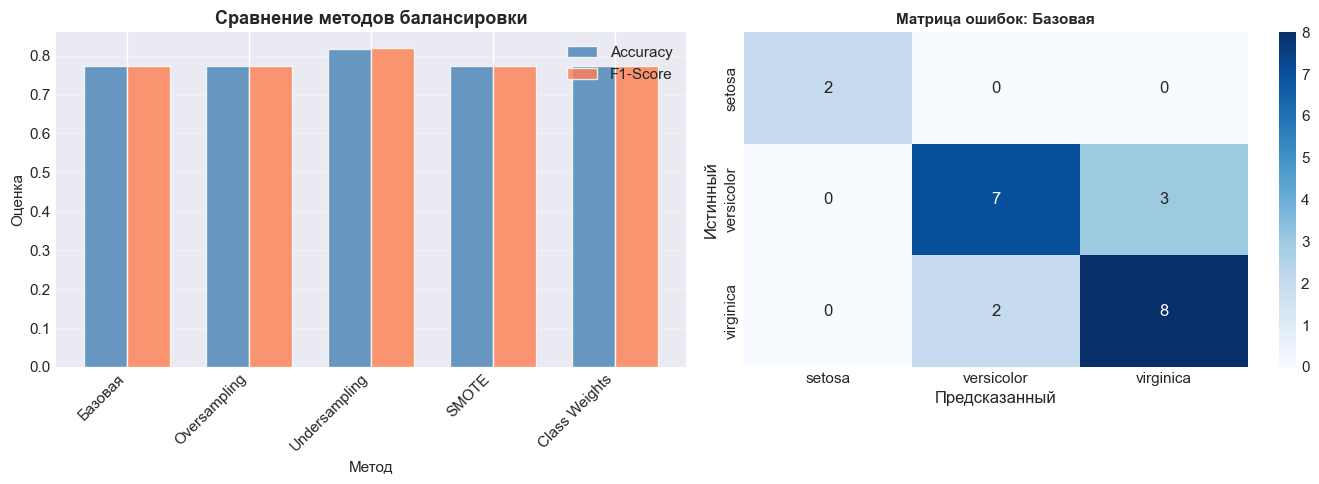


ДОПОЛНИТЕЛЬНОЕ ЗАДАНИЕ 2: PRUNING (ОБРЕЗКА ДЕРЕВА)

Найдено 8 значений alpha для pruning
Alpha диапазон: [0.000000, 0.333403]


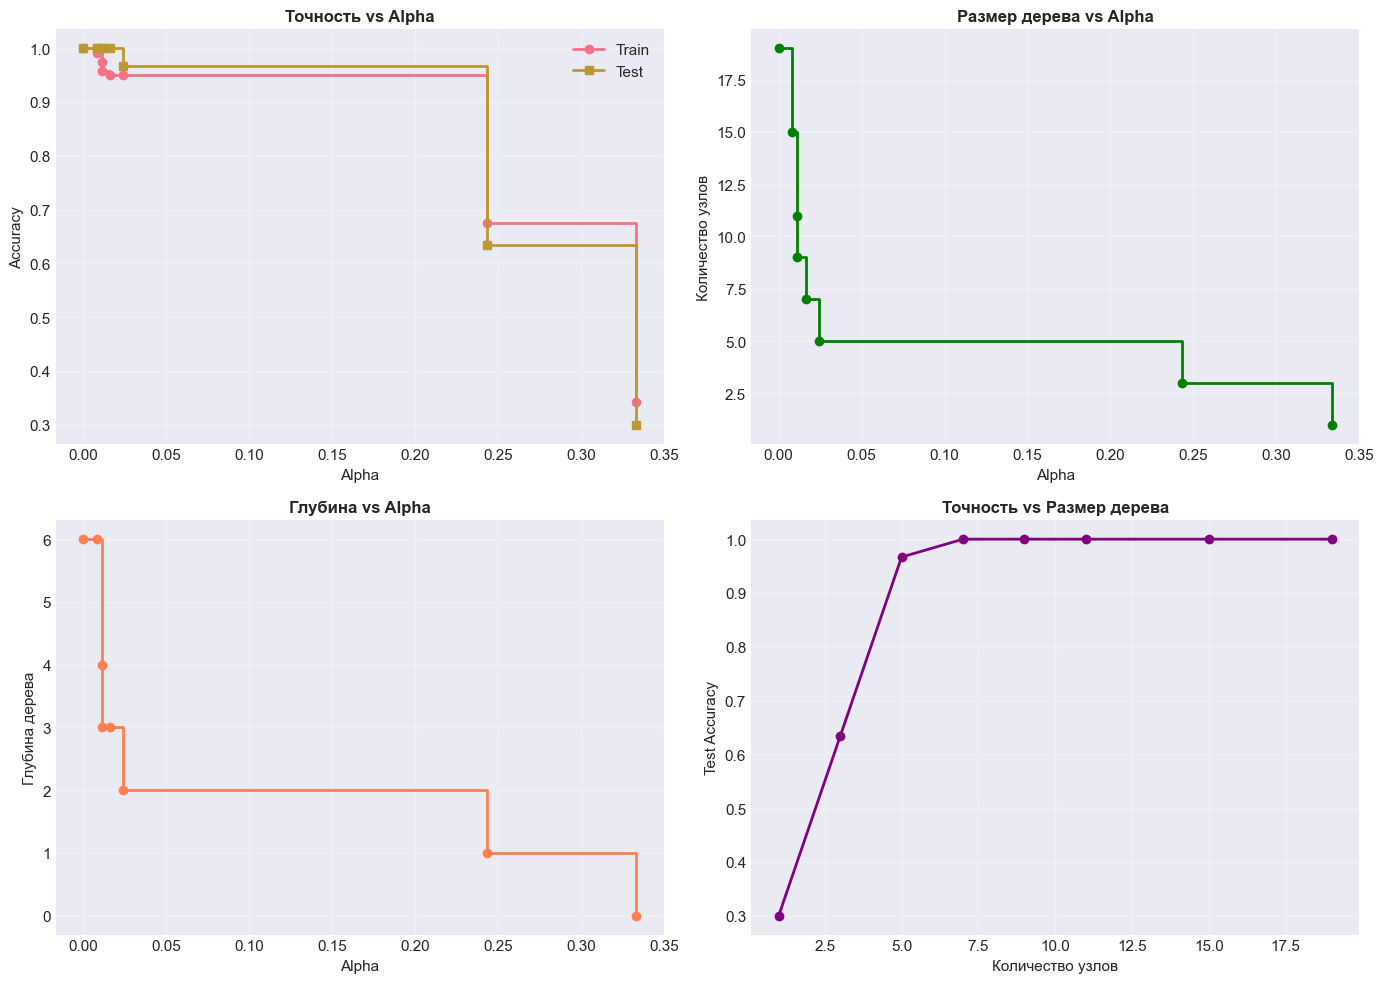


Лучший alpha: 0.000000
Количество узлов до обрезки: 19
Количество узлов после обрезки: 19
Глубина до обрезки: 6
Глубина после обрезки: 6

Точность до обрезки: 1.0000
Точность после обрезки: 1.0000

ДОПОЛНИТЕЛЬНОЕ ЗАДАНИЕ 3: ВИЗУАЛИЗАЦИЯ РЕШЕНИЙ

Путь принятия решения для образца 0:
Признаки: [6.1 2.8 4.7 1.2]
УЗЕЛ 0: petal length (cm) > 2.45 --> ВПРАВО
УЗЕЛ 2: petal length (cm) <= 4.75 --> ВЛЕВО
УЗЕЛ 3: petal width (cm) <= 1.65 --> ВЛЕВО

УЗЕЛ 4 (ЛИСТ): Предсказание = versicolor


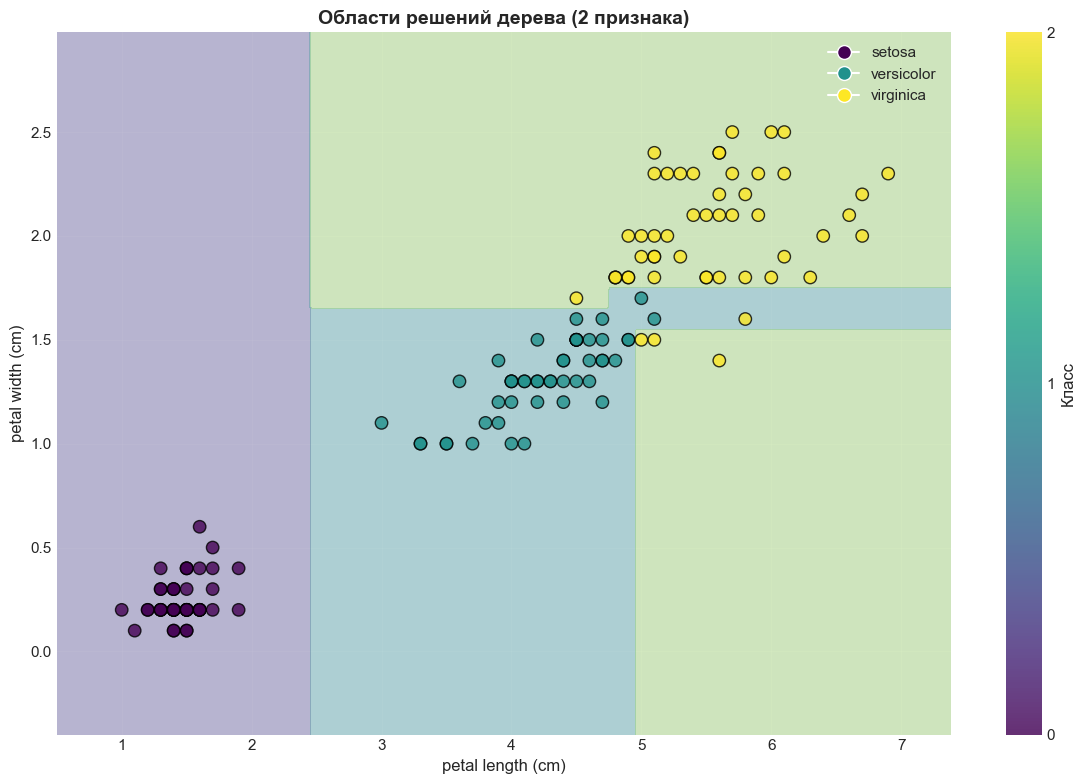


ДОПОЛНИТЕЛЬНОЕ ЗАДАНИЕ 4: СРАВНЕНИЕ С RANDOM FOREST

Сравнение производительности:

Decision Tree:
  Train: 0.9917
  Test: 1.0000
  CV: 0.9533

Random Forest:
  Train: 1.0000
  Test: 1.0000
  CV: 0.9667


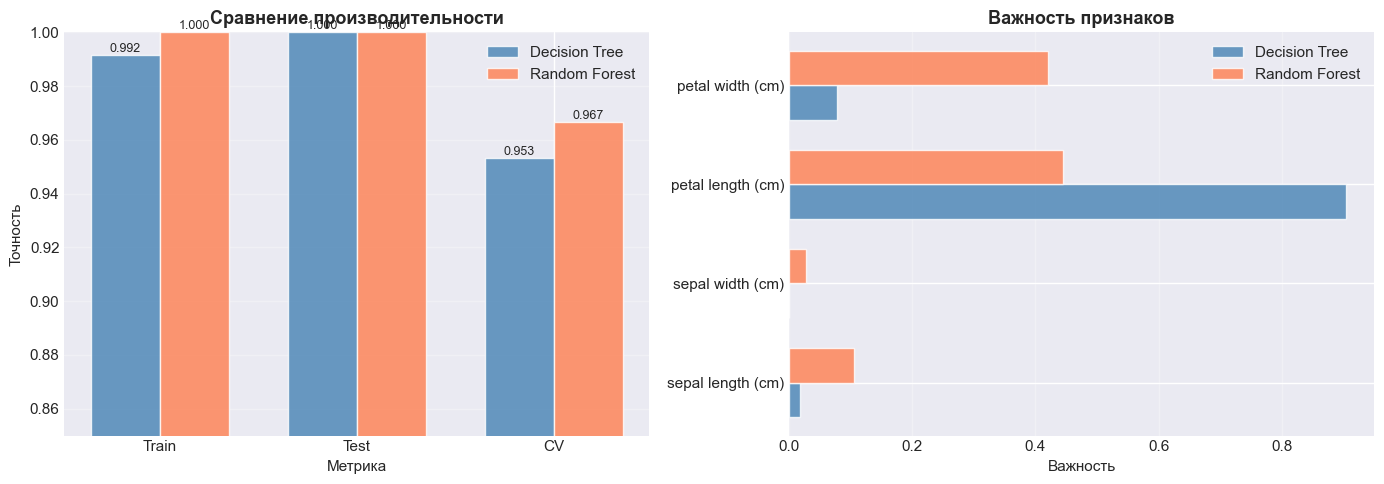


Анализ интерпретируемости:

Decision Tree:
  Количество узлов: 17
  Глубина: 5
  Легко интерпретировать: ДА
  Можно визуализировать: ДА

Random Forest:
  Количество деревьев: 100
  Средняя глубина: ~4.8
  Легко интерпретировать: НЕТ (ансамбль)
  Можно визуализировать: СЛОЖНО

ВЫВОДЫ

1. Random Forest обычно показывает лучшую производительность
2. Decision Tree более интерпретируем и легко визуализируется
3. Random Forest устойчивее к переобучению
4. Для критичных решений лучше использовать Decision Tree (прозрачность)
5. Для максимальной точности лучше Random Forest

✓ Все дополнительные задания выполнены!


In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

iris = load_iris()
X = iris.data
y = iris.target

print("=" * 70)
print("ДОПОЛНИТЕЛЬНОЕ ЗАДАНИЕ 1: НЕСБАЛАНСИРОВАННЫЕ ДАННЫЕ")
print("=" * 70)

print("\nИсходное распределение классов:")
print(Counter(y))

indices_class_0 = np.where(y == 0)[0]
indices_class_1 = np.where(y == 1)[0]
indices_class_2 = np.where(y == 2)[0]

np.random.seed(42)
keep_class_0 = np.random.choice(indices_class_0, size=10, replace=False)
keep_class_1 = np.random.choice(indices_class_1, size=50, replace=False)
keep_class_2 = indices_class_2

indices_imbalanced = np.concatenate([keep_class_0, keep_class_1, keep_class_2])
X_imb = X[indices_imbalanced]
y_imb = y[indices_imbalanced]

print("\nНесбалансированное распределение:")
print(Counter(y_imb))

X_train_imb, X_test_imb, y_train_imb, y_test_imb = train_test_split(
    X_imb, y_imb, test_size=0.2, random_state=42, stratify=y_imb
)

dt_imb = DecisionTreeClassifier(random_state=42)
dt_imb.fit(X_train_imb, y_train_imb)
y_pred_imb = dt_imb.predict(X_test_imb)
acc_imb = accuracy_score(y_test_imb, y_pred_imb)
f1_imb = f1_score(y_test_imb, y_pred_imb, average='weighted')

print("\nБазовая модель (без балансировки):")
print(f"  Accuracy: {acc_imb:.4f}")
print(f"  F1-score: {f1_imb:.4f}")

ros = RandomOverSampler(random_state=42)
X_train_ros, y_train_ros = ros.fit_resample(X_train_imb, y_train_imb)
print("\nOversampling распределение:", Counter(y_train_ros))

dt_ros = DecisionTreeClassifier(random_state=42)
dt_ros.fit(X_train_ros, y_train_ros)
y_pred_ros = dt_ros.predict(X_test_imb)
acc_ros = accuracy_score(y_test_imb, y_pred_ros)
f1_ros = f1_score(y_test_imb, y_pred_ros, average='weighted')

print(f"  Accuracy: {acc_ros:.4f}")
print(f"  F1-score: {f1_ros:.4f}")

rus = RandomUnderSampler(random_state=42)
X_train_rus, y_train_rus = rus.fit_resample(X_train_imb, y_train_imb)
print("\nUndersampling распределение:", Counter(y_train_rus))

dt_rus = DecisionTreeClassifier(random_state=42)
dt_rus.fit(X_train_rus, y_train_rus)
y_pred_rus = dt_rus.predict(X_test_imb)
acc_rus = accuracy_score(y_test_imb, y_pred_rus)
f1_rus = f1_score(y_test_imb, y_pred_rus, average='weighted')

print(f"  Accuracy: {acc_rus:.4f}")
print(f"  F1-score: {f1_rus:.4f}")

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_imb, y_train_imb)
print("\nSMOTE распределение:", Counter(y_train_smote))

dt_smote = DecisionTreeClassifier(random_state=42)
dt_smote.fit(X_train_smote, y_train_smote)
y_pred_smote = dt_smote.predict(X_test_imb)
acc_smote = accuracy_score(y_test_imb, y_pred_smote)
f1_smote = f1_score(y_test_imb, y_pred_smote, average='weighted')

print(f"  Accuracy: {acc_smote:.4f}")
print(f"  F1-score: {f1_smote:.4f}")

class_weights = {0: 5.0, 1: 1.0, 2: 1.0}
dt_weighted = DecisionTreeClassifier(class_weight=class_weights, random_state=42)
dt_weighted.fit(X_train_imb, y_train_imb)
y_pred_weighted = dt_weighted.predict(X_test_imb)
acc_weighted = accuracy_score(y_test_imb, y_pred_weighted)
f1_weighted = f1_score(y_test_imb, y_pred_weighted, average='weighted')

print("\nClass weights:")
print(f"  Accuracy: {acc_weighted:.4f}")
print(f"  F1-score: {f1_weighted:.4f}")

comparison_imb = pd.DataFrame({
    'Метод': ['Базовая', 'Oversampling', 'Undersampling', 'SMOTE', 'Class Weights'],
    'Accuracy': [acc_imb, acc_ros, acc_rus, acc_smote, acc_weighted],
    'F1-Score': [f1_imb, f1_ros, f1_rus, f1_smote, f1_weighted]
})

print("\n" + "=" * 70)
print("СРАВНЕНИЕ МЕТОДОВ")
print("=" * 70)
print(comparison_imb.to_string(index=False))

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

x = np.arange(len(comparison_imb))
width = 0.35

axes[0].bar(x - width/2, comparison_imb['Accuracy'], width, label='Accuracy', 
            color='steelblue', alpha=0.8)
axes[0].bar(x + width/2, comparison_imb['F1-Score'], width, label='F1-Score', 
            color='coral', alpha=0.8)
axes[0].set_xlabel('Метод', fontsize=11)
axes[0].set_ylabel('Оценка', fontsize=11)
axes[0].set_title('Сравнение методов балансировки', fontsize=13, fontweight='bold')
axes[0].set_xticks(x)
axes[0].set_xticklabels(comparison_imb['Метод'], rotation=45, ha='right')
axes[0].legend()
axes[0].grid(axis='y', alpha=0.3)

methods = ['Базовая', 'SMOTE', 'Class Weights']
for idx, (method, pred) in enumerate(zip(methods, [y_pred_imb, y_pred_smote, y_pred_weighted])):
    cm = confusion_matrix(y_test_imb, pred)
    if idx == 0:
        ax = axes[1]
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax,
                   xticklabels=iris.target_names, yticklabels=iris.target_names)
        ax.set_title(f'Матрица ошибок: {method}', fontsize=11, fontweight='bold')
        ax.set_ylabel('Истинный')
        ax.set_xlabel('Предсказанный')

plt.tight_layout()
plt.show()

print("\n" + "=" * 70)
print("ДОПОЛНИТЕЛЬНОЕ ЗАДАНИЕ 2: PRUNING (ОБРЕЗКА ДЕРЕВА)")
print("=" * 70)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

dt_full = DecisionTreeClassifier(random_state=42)
dt_full.fit(X_train, y_train)

path = dt_full.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas
impurities = path.impurities

print(f"\nНайдено {len(ccp_alphas)} значений alpha для pruning")
print(f"Alpha диапазон: [{ccp_alphas.min():.6f}, {ccp_alphas.max():.6f}]")

trees = []
for ccp_alpha in ccp_alphas:
    dt = DecisionTreeClassifier(random_state=42, ccp_alpha=ccp_alpha)
    dt.fit(X_train, y_train)
    trees.append(dt)

train_scores = [dt.score(X_train, y_train) for dt in trees]
test_scores = [dt.score(X_test, y_test) for dt in trees]
node_counts = [dt.tree_.node_count for dt in trees]
depth = [dt.tree_.max_depth for dt in trees]

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

axes[0, 0].plot(ccp_alphas, train_scores, marker='o', label='Train', 
                drawstyle="steps-post", linewidth=2)
axes[0, 0].plot(ccp_alphas, test_scores, marker='s', label='Test', 
                drawstyle="steps-post", linewidth=2)
axes[0, 0].set_xlabel('Alpha', fontsize=11)
axes[0, 0].set_ylabel('Accuracy', fontsize=11)
axes[0, 0].set_title('Точность vs Alpha', fontsize=12, fontweight='bold')
axes[0, 0].legend()
axes[0, 0].grid(alpha=0.3)

axes[0, 1].plot(ccp_alphas, node_counts, marker='o', drawstyle="steps-post", 
                linewidth=2, color='green')
axes[0, 1].set_xlabel('Alpha', fontsize=11)
axes[0, 1].set_ylabel('Количество узлов', fontsize=11)
axes[0, 1].set_title('Размер дерева vs Alpha', fontsize=12, fontweight='bold')
axes[0, 1].grid(alpha=0.3)

axes[1, 0].plot(ccp_alphas, depth, marker='o', drawstyle="steps-post", 
                linewidth=2, color='coral')
axes[1, 0].set_xlabel('Alpha', fontsize=11)
axes[1, 0].set_ylabel('Глубина дерева', fontsize=11)
axes[1, 0].set_title('Глубина vs Alpha', fontsize=12, fontweight='bold')
axes[1, 0].grid(alpha=0.3)

axes[1, 1].plot(node_counts, test_scores, marker='o', linewidth=2, color='purple')
axes[1, 1].set_xlabel('Количество узлов', fontsize=11)
axes[1, 1].set_ylabel('Test Accuracy', fontsize=11)
axes[1, 1].set_title('Точность vs Размер дерева', fontsize=12, fontweight='bold')
axes[1, 1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

best_idx = np.argmax(test_scores)
best_alpha = ccp_alphas[best_idx]
best_pruned_tree = trees[best_idx]

print(f"\nЛучший alpha: {best_alpha:.6f}")
print(f"Количество узлов до обрезки: {dt_full.tree_.node_count}")
print(f"Количество узлов после обрезки: {best_pruned_tree.tree_.node_count}")
print(f"Глубина до обрезки: {dt_full.tree_.max_depth}")
print(f"Глубина после обрезки: {best_pruned_tree.tree_.max_depth}")
print(f"\nТочность до обрезки: {dt_full.score(X_test, y_test):.4f}")
print(f"Точность после обрезки: {best_pruned_tree.score(X_test, y_test):.4f}")

print("\n" + "=" * 70)
print("ДОПОЛНИТЕЛЬНОЕ ЗАДАНИЕ 3: ВИЗУАЛИЗАЦИЯ РЕШЕНИЙ")
print("=" * 70)

dt_viz = DecisionTreeClassifier(max_depth=3, random_state=42)
dt_viz.fit(X_train, y_train)

def get_decision_path(tree, X_sample, feature_names):
    node_indicator = tree.decision_path(X_sample)
    leaf_id = tree.apply(X_sample)
    
    sample_id = 0
    node_index = node_indicator.indices[node_indicator.indptr[sample_id]:
                                       node_indicator.indptr[sample_id + 1]]
    
    print(f"\nПуть принятия решения для образца {sample_id}:")
    print(f"Признаки: {X_sample[0]}")
    
    for node_id in node_index:
        if leaf_id[sample_id] == node_id:
            print(f"\nУЗЕЛ {node_id} (ЛИСТ): Предсказание = {iris.target_names[tree.predict(X_sample)[0]]}")
            continue
        
        feature = feature_names[tree.tree_.feature[node_id]]
        threshold = tree.tree_.threshold[node_id]
        
        if X_sample[sample_id, tree.tree_.feature[node_id]] <= threshold:
            direction = "ВЛЕВО"
            condition = f"{feature} <= {threshold:.2f}"
        else:
            direction = "ВПРАВО"
            condition = f"{feature} > {threshold:.2f}"
        
        print(f"УЗЕЛ {node_id}: {condition} --> {direction}")

sample = X_test[0:1]
get_decision_path(dt_viz, sample, iris.feature_names)

top_2_features = [2, 3]
X_2d = X[:, top_2_features]
X_train_2d, X_test_2d, y_train_2d, y_test_2d = train_test_split(
    X_2d, y, test_size=0.2, random_state=42
)

dt_2d = DecisionTreeClassifier(max_depth=5, random_state=42)
dt_2d.fit(X_train_2d, y_train_2d)

x_min, x_max = X_2d[:, 0].min() - 0.5, X_2d[:, 0].max() + 0.5
y_min, y_max = X_2d[:, 1].min() - 0.5, X_2d[:, 1].max() + 0.5
h = 0.02
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = dt_2d.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(12, 8))
plt.contourf(xx, yy, Z, alpha=0.3, cmap='viridis', levels=2)
scatter = plt.scatter(X_2d[:, 0], X_2d[:, 1], c=y, cmap='viridis', 
                     edgecolor='black', s=80, alpha=0.8)
plt.xlabel(iris.feature_names[top_2_features[0]], fontsize=12)
plt.ylabel(iris.feature_names[top_2_features[1]], fontsize=12)
plt.title('Области решений дерева (2 признака)', fontsize=14, fontweight='bold')
plt.colorbar(scatter, label='Класс', ticks=[0, 1, 2])
legend_elements = [plt.Line2D([0], [0], marker='o', color='w', 
                              markerfacecolor=plt.cm.viridis(i/2), markersize=10, 
                              label=iris.target_names[i]) for i in range(3)]
plt.legend(handles=legend_elements, loc='best')
plt.grid(alpha=0.2)
plt.tight_layout()
plt.show()

print("\n" + "=" * 70)
print("ДОПОЛНИТЕЛЬНОЕ ЗАДАНИЕ 4: СРАВНЕНИЕ С RANDOM FOREST")
print("=" * 70)

dt_best = DecisionTreeClassifier(max_depth=5, min_samples_split=2, 
                                  min_samples_leaf=1, random_state=42)
dt_best.fit(X_train, y_train)

rf = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
rf.fit(X_train, y_train)

dt_train = dt_best.score(X_train, y_train)
dt_test = dt_best.score(X_test, y_test)
dt_cv = cross_val_score(dt_best, X, y, cv=5).mean()

rf_train = rf.score(X_train, y_train)
rf_test = rf.score(X_test, y_test)
rf_cv = cross_val_score(rf, X, y, cv=5).mean()

print("\nСравнение производительности:")
print(f"\nDecision Tree:")
print(f"  Train: {dt_train:.4f}")
print(f"  Test: {dt_test:.4f}")
print(f"  CV: {dt_cv:.4f}")

print(f"\nRandom Forest:")
print(f"  Train: {rf_train:.4f}")
print(f"  Test: {rf_test:.4f}")
print(f"  CV: {rf_cv:.4f}")

comparison_df = pd.DataFrame({
    'Модель': ['Decision Tree', 'Random Forest'] * 3,
    'Метрика': ['Train', 'Train', 'Test', 'Test', 'CV', 'CV'],
    'Точность': [dt_train, rf_train, dt_test, rf_test, dt_cv, rf_cv]
})

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

metrics = ['Train', 'Test', 'CV']
dt_scores = [dt_train, dt_test, dt_cv]
rf_scores = [rf_train, rf_test, rf_cv]

x = np.arange(len(metrics))
width = 0.35

bars1 = axes[0].bar(x - width/2, dt_scores, width, label='Decision Tree', 
                    color='steelblue', alpha=0.8)
bars2 = axes[0].bar(x + width/2, rf_scores, width, label='Random Forest', 
                    color='coral', alpha=0.8)
axes[0].set_xlabel('Метрика', fontsize=11)
axes[0].set_ylabel('Точность', fontsize=11)
axes[0].set_title('Сравнение производительности', fontsize=13, fontweight='bold')
axes[0].set_xticks(x)
axes[0].set_xticklabels(metrics)
axes[0].legend()
axes[0].grid(axis='y', alpha=0.3)
axes[0].set_ylim([0.85, 1.0])

for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        axes[0].text(bar.get_x() + bar.get_width()/2., height,
                    f'{height:.3f}', ha='center', va='bottom', fontsize=9)

dt_importance = dt_best.feature_importances_
rf_importance = rf.feature_importances_

x_imp = np.arange(len(iris.feature_names))
axes[1].barh(x_imp - width/2, dt_importance, width, label='Decision Tree', 
            color='steelblue', alpha=0.8)
axes[1].barh(x_imp + width/2, rf_importance, width, label='Random Forest', 
            color='coral', alpha=0.8)
axes[1].set_yticks(x_imp)
axes[1].set_yticklabels(iris.feature_names)
axes[1].set_xlabel('Важность', fontsize=11)
axes[1].set_title('Важность признаков', fontsize=13, fontweight='bold')
axes[1].legend()
axes[1].grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()

print("\nАнализ интерпретируемости:")
print(f"\nDecision Tree:")
print(f"  Количество узлов: {dt_best.tree_.node_count}")
print(f"  Глубина: {dt_best.tree_.max_depth}")
print(f"  Легко интерпретировать: ДА")
print(f"  Можно визуализировать: ДА")

print(f"\nRandom Forest:")
print(f"  Количество деревьев: {rf.n_estimators}")
print(f"  Средняя глубина: ~{np.mean([tree.tree_.max_depth for tree in rf.estimators_]):.1f}")
print(f"  Легко интерпретировать: НЕТ (ансамбль)")
print(f"  Можно визуализировать: СЛОЖНО")

print("\n" + "=" * 70)
print("ВЫВОДЫ")
print("=" * 70)
print("\n1. Random Forest обычно показывает лучшую производительность")
print("2. Decision Tree более интерпретируем и легко визуализируется")
print("3. Random Forest устойчивее к переобучению")
print("4. Для критичных решений лучше использовать Decision Tree (прозрачность)")
print("5. Для максимальной точности лучше Random Forest")

print("\n✓ Все дополнительные задания выполнены!")